# Main file where where simulation is run

In [1]:
##  load all the dependencies and files needed
%run loadpackagesandfiles.ipynb


In [2]:
##  create a graph of the loaded data, 
## gives access to variable FG which is the (directed) graph displayed below 
## (if it is not shown the plot can be activated by uncommenting in buildgraph.ipynb file)

%run buildgraph.ipynb
%run EnviromentReport.ipynb

#%run locktest.ipynb

found restriction 8.7


In [3]:

# loop over edges with data and check voorwaarden
'''
for edge in FG_S.edges(data=True):
    if edge[0] in [182]:
        print(edge)
    if edge[1] in [182]:
        print(edge)
    if edge[0] in [132]:
        print(edge)
    if edge[1] in [132]:
        print(edge)


# same for nodes
for node in FG.nodes(data=True):
    if node[0] == 155:
        print(node)
    if node[0] == 156:
        print(node)
    if node[0] == 73:
        print(node)
    if node[0] == 72:
        print(node)

'''


'\nfor edge in FG_S.edges(data=True):\n    if edge[0] in [182]:\n        print(edge)\n    if edge[1] in [182]:\n        print(edge)\n    if edge[0] in [132]:\n        print(edge)\n    if edge[1] in [132]:\n        print(edge)\n\n\n# same for nodes\nfor node in FG.nodes(data=True):\n    if node[0] == 155:\n        print(node)\n    if node[0] == 156:\n        print(node)\n    if node[0] == 73:\n        print(node)\n    if node[0] == 72:\n        print(node)\n\n'

In [4]:
## obtain the paths possible sorted by length 
## (these paths are classes containing node keys and path lengths (in meter?))
%run get_paths.ipynb
#%run testpaths.ipynb

## below you see the data that is contained in a path

In [5]:
print(len(ordered_paths))
#ordered_paths[8].plot(FG, save=True)


54


In [6]:
%run vessels.ipynb

In [7]:
#list_with_vessels = init_vessels([M8, M8_high, M8_loaded_low, M8_loaded], ordered_paths)
#new
#list_with_vesselsM1 = init_vessels([M1, M1_loaded], ordered_paths)

In [8]:
def start(env, vessel):
    while True:
        
        vessel.log_entry("Start sailing", env.now, "", vessel.geometry)
        yield from vessel.move()
        vessel.log_entry("Stop sailing", env.now, "", vessel.geometry)
        vessel.report()
        if vessel.geometry == nx.get_node_attributes(FG, "geometry")[vessel.route[-1]]:
            break

Queues:  Hansweertlock 0 0 1.8235450893548515
Queues:  Krammerlock 0 0 2.0125674290144318
Queues:  Hansweertlock 0 0 2.21373344868061
Queues:  Kreekraklock 0 0 2.700125365372056
Queues:  Kreekraklock 0 0 2.7414823155401344
Queues:  Krammerlock 0 0 2.8873901937134385
Queues:  Krammerlock 0 0 3.137765706760693
Queues:  Kreekraklock 0 0 3.1424773920121556
Queues:  Hansweertlock 0 0 3.1804915804535208
Queues:  Kreekraklock 0 0 3.5111605926691345
Queues:  Kreekraklock 0 0 3.56667918075463
Queues:  Kreekraklock 0 0 3.7226113574171706
Queues:  Hansweertlock 0 0 3.7272607894997116
Queues:  Kreekraklock 0 1 3.764973844653809
Queues:  Krammerlock 0 0 4.050159865166367
Queues:  Kreekraklock 0 0 4.159785077099653
Queues:  Kreekraklock 0 0 4.365412822558756
Queues:  Hansweertlock 0 0 4.372108156595401
Queues:  Kreekraklock 0 0 4.499630507687277
Queues:  Krammerlock 0 0 4.5206167832675845
Queues:  Kreekraklock 0 0 4.608554148438149
Queues:  Kreekraklock 0 1 4.66781276267689
Queues:  Kreekraklock 0 1

Queues:  Krammerlock 0 0 14.073310809991117
Queues:  Krammerlock 0 0 14.075513872943727
Queues:  Kreekraklock 0 1 14.099090488920528
Queues:  Hansweertlock 2 2 14.188437575545207
Queues:  Hansweertlock 1 1 14.32384042559971
Queues:  Kreekraklock 0 0 14.346237464958994
Queues:  Hansweertlock 0 1 14.420195482904079
Queues:  Kreekraklock 0 0 14.424965072199774
Queues:  Hansweertlock 0 1 14.434454311163394
Queues:  Krammerlock 0 1 14.454200927900832
Queues:  Hansweertlock 2 1 14.524534147067637
Queues:  Krammerlock 0 1 14.535753456808116
Queues:  Kreekraklock 0 1 14.573187325235898
Queues:  Krammerlock 0 0 14.598725017728471
Queues:  Krammerlock 0 0 14.6494502295982
Queues:  Hansweertlock 2 2 14.655977905951353
Queues:  Kreekraklock 0 1 14.685671814493306
Queues:  Kreekraklock 0 0 14.712476355242867
Queues:  Hansweertlock 1 2 14.733366205311095
Queues:  Kreekraklock 0 1 14.77434388564887
Queues:  Kreekraklock 0 1 14.83639326182057
Queues:  Kreekraklock 0 1 14.842103509196429
Queues:  Kreek

Queues:  Krammerlock 0 1 23.262844426696788
Queues:  Kreekraklock 0 0 23.40750364809811
Queues:  Hansweertlock 0 0 23.56761005126655
Queues:  Kreekraklock 0 0 23.572656825754294
Queues:  Hansweertlock 0 0 23.615245302937435
Queues:  Hansweertlock 0 0 23.66287224325311
Queues:  Kreekraklock 0 0 23.799218125416974
Queues:  Krammerlock 0 0 23.80262452273445
Queues:  Kreekraklock 0 0 23.845518599292312
Queues:  Krammerlock 0 0 23.852655648799193
Queues:  Kreekraklock 0 0 23.86027868288282
Queues:  Hansweertlock 0 0 23.925136574961584
Queues:  Hansweertlock 0 0 24.229831974503977
Queues:  Kreekraklock 0 0 24.41707151967442
Queues:  Kreekraklock 0 0 24.654071399833946
Queues:  Kreekraklock 0 0 24.67545212787779
Queues:  Krammerlock 0 0 24.72545236150033
Queues:  Hansweertlock 0 0 24.952446609723044
Queues:  Hansweertlock 0 0 25.166758669745157
Queues:  Kreekraklock 0 0 25.1674489745583
Queues:  Hansweertlock 0 0 25.69131343636884
Queues:  Kreekraklock 0 0 25.721561357263035
Queues:  Kreekrak

Queues:  Krammerlock 0 0 36.58496321486047
Queues:  Kreekraklock 6 5 36.7136254547607
Queues:  Krammerlock 0 1 36.76361619681834
Queues:  Kreekraklock 5 6 36.81276836475458
Queues:  Hansweertlock 0 0 36.83565992848906
Queues:  Kreekraklock 6 6 36.88711970127377
Queues:  Hansweertlock 0 0 36.925205361339415
Queues:  Kreekraklock 5 6 37.01853803474636
Queues:  Hansweertlock 0 0 37.117578936159155
Queues:  Kreekraklock 5 6 37.119687504948324
Queues:  Hansweertlock 0 0 37.141909783691595
Queues:  Kreekraklock 6 6 37.16538279930937
Queues:  Kreekraklock 6 6 37.17960358370691
Queues:  Hansweertlock 0 1 37.24487563684942
Queues:  Hansweertlock 0 1 37.24516277277151
Queues:  Hansweertlock 0 1 37.280669708125174
Queues:  Kreekraklock 5 7 37.315629653659386
Queues:  Kreekraklock 6 6 37.385547155296905
Queues:  Hansweertlock 0 1 37.41068904624835
Queues:  Hansweertlock 0 1 37.46512739578229
Queues:  Kreekraklock 6 6 37.51514928712421
Queues:  Kreekraklock 6 7 37.587622359869066
Queues:  Kreekrakl

Queues:  Kreekraklock 1 1 45.51582783563715
Queues:  Krammerlock 1 2 45.56510413839152
Queues:  Hansweertlock 0 0 45.584099695998866
Queues:  Kreekraklock 1 1 45.65162299628333
Queues:  Kreekraklock 0 1 45.69095168539917
Queues:  Krammerlock 2 0 45.748937012589224
Queues:  Kreekraklock 0 0 45.81614938698875
Queues:  Krammerlock 2 0 45.83319769949604
Queues:  Kreekraklock 0 1 45.93082751418908
Queues:  Kreekraklock 1 0 46.01410801493727
Queues:  Krammerlock 0 1 46.06027557432122
Queues:  Krammerlock 1 1 46.114151264489614
Queues:  Hansweertlock 0 0 46.14647791254237
Queues:  Hansweertlock 0 0 46.336382210945395
Queues:  Krammerlock 0 0 46.412197622116274
Queues:  Kreekraklock 0 0 46.4574543085318
Queues:  Hansweertlock 0 0 46.46448238050334
Queues:  Kreekraklock 0 0 46.59722375517593
Queues:  Hansweertlock 0 0 46.60481037241172
Queues:  Kreekraklock 0 0 46.71636923234425
Queues:  Hansweertlock 0 0 46.81336376595434
Queues:  Krammerlock 0 0 46.91229948118137
Queues:  Hansweertlock 0 1 46

Queues:  Krammerlock 0 2 59.54720476684422
Queues:  Krammerlock 0 2 59.568401060147146
Queues:  Kreekraklock 0 4 59.60212158791668
Queues:  Hansweertlock 0 0 59.61526161873353
Queues:  Kreekraklock 1 4 59.67902043442606
Queues:  Kreekraklock 1 3 59.732855091648794
Queues:  Kreekraklock 2 2 59.784070985618484
Queues:  Hansweertlock 0 0 59.80219315639272
Queues:  Krammerlock 1 0 59.887247642110935
Queues:  Hansweertlock 0 0 59.9102329405029
Queues:  Kreekraklock 2 2 59.9182817088155
Queues:  Krammerlock 0 1 59.96191420030952
Queues:  Kreekraklock 2 3 60.00308305081206
Queues:  Krammerlock 0 0 60.010283925074766
Queues:  Kreekraklock 3 3 60.06374753306984
Queues:  Kreekraklock 3 3 60.08640178776987
Queues:  Kreekraklock 3 4 60.094842009474355
Queues:  Kreekraklock 3 4 60.10924474557783
Queues:  Hansweertlock 0 0 60.15847218990862
Queues:  Hansweertlock 0 0 60.18339764334268
Queues:  Kreekraklock 5 3 60.18764195417249
Queues:  Kreekraklock 5 3 60.19258542911963
Queues:  Hansweertlock 0 0 6

Queues:  Krammerlock 0 0 68.03089075228606
Queues:  Hansweertlock 0 0 68.04795661909458
Queues:  Kreekraklock 5 4 68.07819010631857
Queues:  Krammerlock 0 0 68.09832437728804
Queues:  Krammerlock 0 0 68.10960675461979
Queues:  Hansweertlock 0 0 68.17104582273322
Queues:  Hansweertlock 0 0 68.21841550160532
Queues:  Hansweertlock 0 0 68.2377624959812
Queues:  Hansweertlock 0 0 68.24665667076496
Queues:  Kreekraklock 5 3 68.27228741420055
Queues:  Kreekraklock 4 3 68.28456001571233
Queues:  Hansweertlock 0 2 68.50761871404097
Queues:  Hansweertlock 0 1 68.53006112302177
Queues:  Kreekraklock 2 3 68.60366511816864
Queues:  Kreekraklock 2 3 68.74417624867353
Queues:  Hansweertlock 0 1 68.76587511903988
Queues:  Hansweertlock 0 1 68.82322856381222
Queues:  Krammerlock 0 0 68.84850175193634
Queues:  Krammerlock 0 0 68.92710830765228
Queues:  Kreekraklock 2 2 68.9883268176741
Queues:  Krammerlock 0 0 68.99825890115493
Queues:  Krammerlock 0 0 69.09136763330167
Queues:  Kreekraklock 2 3 69.092

Queues:  Kreekraklock 3 3 82.6721498233453
Queues:  Kreekraklock 3 3 82.69617188596246
Queues:  Krammerlock 0 0 82.72007470135182
Queues:  Kreekraklock 2 5 82.75053541640004
Queues:  Krammerlock 0 0 82.7619456442684
Queues:  Kreekraklock 2 4 82.77949498806336
Queues:  Kreekraklock 2 4 82.78673245843571
Queues:  Kreekraklock 3 2 82.86571692429796
Queues:  Krammerlock 0 2 82.89168828760795
Queues:  Kreekraklock 3 3 83.10465243887815
Queues:  Hansweertlock 0 0 83.13883400198526
Queues:  Hansweertlock 0 0 83.35358351706194
Queues:  Hansweertlock 0 0 83.37199095260239
Queues:  Kreekraklock 2 2 83.40641299733164
Queues:  Krammerlock 0 0 83.42596591803502
Queues:  Krammerlock 0 0 83.51381670555016
Queues:  Kreekraklock 0 3 83.52490530709537
Queues:  Kreekraklock 0 2 83.53631053695236
Queues:  Kreekraklock 1 2 83.56976396869753
Queues:  Hansweertlock 0 0 83.58275441725695
Queues:  Kreekraklock 2 2 83.59254033488203
Queues:  Kreekraklock 3 3 83.6566012045577
Queues:  Kreekraklock 3 3 83.7248190

Queues:  Hansweertlock 0 0 90.61889646113922
Queues:  Krammerlock 1 2 90.6221733880039
Queues:  Hansweertlock 0 0 90.6952805648414
Queues:  Hansweertlock 0 0 90.72390022597796
Queues:  Kreekraklock 0 3 90.77227253306899
Queues:  Hansweertlock 0 1 90.92840784614593
Queues:  Kreekraklock 1 0 90.9610271167461
Queues:  Krammerlock 0 0 91.01713445454529
Queues:  Kreekraklock 1 1 91.05709519072185
Queues:  Hansweertlock 0 0 91.15627681999752
Queues:  Hansweertlock 0 0 91.28684804692399
Queues:  Kreekraklock 0 0 91.33864743429459
Queues:  Hansweertlock 0 0 91.40152090596558
Queues:  Kreekraklock 0 1 91.40630320283844
Queues:  Kreekraklock 0 1 91.48280473467345
Queues:  Kreekraklock 0 1 91.52017538495518
Queues:  Krammerlock 0 0 91.52921162228724
Queues:  Hansweertlock 0 1 91.65313797968147
Queues:  Kreekraklock 0 0 91.68621917271035
Queues:  Hansweertlock 0 0 91.77971982578806
Queues:  Hansweertlock 0 0 91.83269725908887
Queues:  Krammerlock 0 0 91.89671002915969
Queues:  Kreekraklock 0 0 91.

Queues:  Hansweertlock 0 0 104.79358861605628
Queues:  Krammerlock 0 0 104.91976976522349
Queues:  Krammerlock 0 0 105.08665371674576
Queues:  Kreekraklock 0 0 105.13759334783789
Queues:  Hansweertlock 0 0 105.14545316453649
Queues:  Krammerlock 0 1 105.18493585910139
Queues:  Kreekraklock 0 0 105.33606966638892
Queues:  Kreekraklock 0 0 105.35470622754504
Queues:  Hansweertlock 0 0 105.40975971984653
Queues:  Hansweertlock 0 0 105.41525889853071
Queues:  Hansweertlock 0 0 105.5114964690481
Queues:  Kreekraklock 0 0 105.56093097400847
Queues:  Kreekraklock 0 0 105.5805777087803
Queues:  Hansweertlock 0 1 105.5861857853111
Queues:  Kreekraklock 0 2 105.67229532631916
Queues:  Kreekraklock 0 1 105.70000888828105
Queues:  Hansweertlock 0 0 105.71134328933907
Queues:  Krammerlock 0 0 105.7561345832951
Queues:  Kreekraklock 0 1 105.81117392552727
Queues:  Kreekraklock 0 0 105.8727031181536
Queues:  Hansweertlock 0 0 105.89023125024502
Queues:  Kreekraklock 0 1 105.96347438176144
Queues:  Ha

Queues:  Hansweertlock 0 0 112.67217606014718
Queues:  Hansweertlock 0 0 112.71394398024034
Queues:  Kreekraklock 1 2 112.8426104376136
Queues:  Hansweertlock 0 0 112.86812956583648
Queues:  Kreekraklock 1 2 112.94721940915313
Queues:  Hansweertlock 0 0 112.94878873210585
Queues:  Hansweertlock 0 0 112.98066350408043
Queues:  Krammerlock 0 0 113.02742612738005
Queues:  Krammerlock 0 0 113.05804401598652
Queues:  Kreekraklock 2 1 113.07226131200132
Queues:  Hansweertlock 0 2 113.08306723956326
Queues:  Hansweertlock 0 2 113.08621941032114
Queues:  Hansweertlock 0 1 113.15819314709832
Queues:  Krammerlock 0 0 113.19875342114635
Queues:  Kreekraklock 1 0 113.27680385615868
Queues:  Kreekraklock 1 0 113.2853926665591
Queues:  Krammerlock 0 1 113.34386461501816
Queues:  Kreekraklock 1 2 113.41916410634475
Queues:  Kreekraklock 1 2 113.47407655058882
Queues:  Hansweertlock 0 0 113.50835458301455
Queues:  Kreekraklock 2 1 113.52946240295395
Queues:  Kreekraklock 2 2 113.59622864975549
Queues:

Queues:  Krammerlock 0 0 126.45022795976082
Queues:  Kreekraklock 0 0 126.48559127089229
Queues:  Kreekraklock 0 0 126.53257139833245
Queues:  Kreekraklock 0 1 126.58318614524947
Queues:  Kreekraklock 0 0 126.7496318826064
Queues:  Hansweertlock 0 0 126.7666617081886
Queues:  Kreekraklock 0 1 126.80601260845259
Queues:  Krammerlock 0 0 126.87287618817909
Queues:  Kreekraklock 0 0 127.09319976885163
Queues:  Hansweertlock 0 0 127.10114026035357
Queues:  Kreekraklock 0 1 127.14340443552884
Queues:  Kreekraklock 0 0 127.29341604290131
Queues:  Hansweertlock 0 0 127.2949570448094
Queues:  Kreekraklock 0 0 127.33708979646816
Queues:  Hansweertlock 0 0 127.37052021562572
Queues:  Hansweertlock 0 0 127.37252928458017
Queues:  Kreekraklock 0 0 127.54041262782908
Queues:  Kreekraklock 0 0 127.718671195952
Queues:  Krammerlock 0 0 127.72396540700505
Queues:  Kreekraklock 0 0 127.88491725930689
Queues:  Kreekraklock 0 0 127.89521602481541
Queues:  Kreekraklock 0 1 127.9894335766551
Queues:  Kreek

Queues:  Krammerlock 0 0 135.51593157045951
Queues:  Hansweertlock 2 1 135.5259011831955
Queues:  Hansweertlock 2 1 135.53701547977522
Queues:  Kreekraklock 1 2 135.55006721538828
Queues:  Kreekraklock 2 2 135.59738362761405
Queues:  Hansweertlock 2 1 135.60104475075707
Queues:  Krammerlock 0 1 135.623235520004
Queues:  Krammerlock 0 1 135.6547237086171
Queues:  Krammerlock 0 0 135.70307901114685
Queues:  Kreekraklock 1 3 135.70475643239035
Queues:  Kreekraklock 1 3 135.7115367621895
Queues:  Krammerlock 0 0 135.73740903638844
Queues:  Hansweertlock 1 3 135.75966122859032
Queues:  Hansweertlock 0 3 135.78660342639856
Queues:  Krammerlock 0 2 135.79336507162984
Queues:  Kreekraklock 2 2 135.82321045614972
Queues:  Kreekraklock 1 2 135.88273106690798
Queues:  Hansweertlock 1 0 135.98279314549742
Queues:  Krammerlock 0 0 136.11612821330365
Queues:  Kreekraklock 2 1 136.13632783235886
Queues:  Kreekraklock 2 1 136.13918757997507
Queues:  Krammerlock 0 0 136.15336711737328
Queues:  Hansweer

Queues:  Hansweertlock 0 0 147.02673937269986
Queues:  Hansweertlock 0 0 147.09084789569218
Queues:  Hansweertlock 0 0 147.1686565444682
Queues:  Kreekraklock 0 0 147.21090539957282
Queues:  Kreekraklock 0 0 147.22297418260632
Queues:  Krammerlock 0 0 147.22907206110372
Queues:  Kreekraklock 0 0 147.25626213436823
Queues:  Hansweertlock 0 0 147.47552691584892
Queues:  Hansweertlock 0 0 147.47727518464436
Queues:  Krammerlock 0 0 147.71747076801216
Queues:  Krammerlock 0 0 147.85015234394464
Queues:  Hansweertlock 0 0 147.89889640040855
Queues:  Hansweertlock 0 0 147.9986048595844
Queues:  Kreekraklock 0 0 148.14322260228303
Queues:  Hansweertlock 0 0 148.30956062648585
Queues:  Krammerlock 0 0 148.32031839881395
Queues:  Kreekraklock 0 0 148.3590618595375
Queues:  Hansweertlock 0 0 148.42387740347306
Queues:  Kreekraklock 0 0 148.434728299433
Queues:  Hansweertlock 0 0 148.64025024740184
Queues:  Kreekraklock 0 0 148.80424214747995
Queues:  Kreekraklock 0 0 148.83434140396542
Queues:  

Queues:  Hansweertlock 0 0 157.62842158643218
Queues:  Kreekraklock 7 6 157.76675040083072
Queues:  Kreekraklock 7 6 157.81799962877417
Queues:  Kreekraklock 7 6 157.83078002538969
Queues:  Kreekraklock 7 6 157.84988685943142
Queues:  Hansweertlock 0 1 157.85302709978023
Queues:  Hansweertlock 0 1 157.88005987462205
Queues:  Hansweertlock 0 1 157.9042402367
Queues:  Hansweertlock 0 1 157.9156612411954
Queues:  Hansweertlock 0 1 157.92132594340526
Queues:  Hansweertlock 0 1 157.94426387453663
Queues:  Kreekraklock 6 9 157.9944214120097
Queues:  Kreekraklock 7 9 158.04261478360215
Queues:  Krammerlock 0 0 158.06517628156917
Queues:  Krammerlock 0 0 158.09600046311456
Queues:  Hansweertlock 3 0 158.1122510704123
Queues:  Kreekraklock 7 8 158.12315720852146
Queues:  Kreekraklock 6 8 158.13570725978755
Queues:  Krammerlock 0 0 158.15999546113557
Queues:  Krammerlock 0 0 158.23231723674672
Queues:  Krammerlock 0 0 158.25683796435274
Queues:  Hansweertlock 2 0 158.38400390584405
Queues:  Hans

Queues:  Krammerlock 0 0 166.41429880968596
Queues:  Hansweertlock 0 0 166.5095773112783
Queues:  Kreekraklock 0 0 166.5324297156394
Queues:  Kreekraklock 0 1 166.58811647010657
Queues:  Krammerlock 0 1 166.5978109995382
Queues:  Kreekraklock 0 1 166.79477019838654
Queues:  Kreekraklock 0 0 166.95314952793214
Queues:  Kreekraklock 0 0 166.96533223278482
Queues:  Kreekraklock 0 0 166.9687186696302
Queues:  Hansweertlock 0 0 167.03533308103525
Queues:  Hansweertlock 0 0 167.1615754183979
Queues:  Kreekraklock 0 1 167.57487275106288
Queues:  Krammerlock 0 0 167.58373157648006
Queues:  Krammerlock 0 0 167.5923916578259
Queues:  Kreekraklock 0 0 167.87551424960634
Queues:  Hansweertlock 0 0 167.8848405186092
Queues:  Kreekraklock 0 0 167.96970602309185
Queues:  Kreekraklock 0 0 167.98622918234875
Queues:  Hansweertlock 0 0 168.02858491149496
Queues:  Kreekraklock 0 0 168.16457788252012
Queues:  Hansweertlock 0 0 168.25035780948016
Queues:  Krammerlock 0 0 168.2590583244926
Queues:  Kreekrak

Queues:  Hansweertlock 0 0 180.54916700528818
Queues:  Krammerlock 1 2 180.54946801531807
Queues:  Kreekraklock 0 0 180.56165667275812
Queues:  Krammerlock 1 2 180.57271986828357
Queues:  Krammerlock 1 2 180.58398378062017
Queues:  Krammerlock 1 1 180.59247356992876
Queues:  Kreekraklock 0 0 180.63621363383746
Queues:  Hansweertlock 0 1 180.6802484879103
Queues:  Kreekraklock 0 0 180.7376309825363
Queues:  Kreekraklock 0 0 180.7495502899076
Queues:  Krammerlock 2 1 180.79393828455088
Queues:  Krammerlock 2 1 180.81608847349872
Queues:  Hansweertlock 0 0 180.96410256885255
Queues:  Krammerlock 1 3 180.97846563477705
Queues:  Krammerlock 2 2 181.11379372049447
Queues:  Krammerlock 2 2 181.11619966375025
Queues:  Krammerlock 2 2 181.13333943251476
Queues:  Kreekraklock 0 0 181.14913806240583
Queues:  Kreekraklock 0 1 181.22457479467525
Queues:  Kreekraklock 0 1 181.24879582562093
Queues:  Kreekraklock 0 1 181.2667723614422
Queues:  Krammerlock 1 5 181.28660780103263
Queues:  Hansweertlock

Queues:  Kreekraklock 0 1 188.47565054913284
Queues:  Hansweertlock 0 3 188.50179379761215
Queues:  Krammerlock 0 0 188.58598680652912
Queues:  Krammerlock 0 0 188.64766551631158
Queues:  Krammerlock 0 0 188.65434154066486
Queues:  Kreekraklock 1 0 188.69025368173786
Queues:  Kreekraklock 1 0 188.71706828981266
Queues:  Hansweertlock 0 2 188.7510190524873
Queues:  Kreekraklock 0 2 188.79118201314287
Queues:  Kreekraklock 0 1 188.8062983163015
Queues:  Kreekraklock 2 1 188.85876972779363
Queues:  Kreekraklock 2 0 188.87685797662192
Queues:  Hansweertlock 0 0 188.88873865572916
Queues:  Hansweertlock 0 0 188.90299688708615
Queues:  Krammerlock 0 1 188.92529015406063
Queues:  Hansweertlock 0 0 188.92621788051324
Queues:  Krammerlock 0 1 188.9857589541179
Queues:  Hansweertlock 0 3 189.01983627202722
Queues:  Hansweertlock 0 1 189.22097147738407
Queues:  Kreekraklock 0 0 189.32731228738027
Queues:  Hansweertlock 0 0 189.39370904534152
Queues:  Kreekraklock 0 0 189.42744243049003
Queues:  H

Queues:  Kreekraklock 1 2 202.74823505953685
Queues:  Kreekraklock 2 2 202.80654768544747
Queues:  Krammerlock 0 2 202.81021048455693
Queues:  Hansweertlock 0 0 202.8601361123878
Queues:  Krammerlock 0 1 202.9721864599942
Queues:  Krammerlock 0 1 202.973289367906
Queues:  Kreekraklock 0 2 202.9962905068521
Queues:  Krammerlock 0 1 203.04557301490885
Queues:  Kreekraklock 1 0 203.16079390679127
Queues:  Kreekraklock 1 1 203.2469599028238
Queues:  Krammerlock 1 0 203.27067346176983
Queues:  Hansweertlock 0 0 203.29044250160146
Queues:  Kreekraklock 0 2 203.33148443224465
Queues:  Hansweertlock 0 0 203.34595568204762
Queues:  Kreekraklock 0 1 203.42953681919946
Queues:  Kreekraklock 0 1 203.43688237584328
Queues:  Kreekraklock 0 1 203.46178578163494
Queues:  Kreekraklock 2 1 203.5699166497114
Queues:  Krammerlock 1 0 203.58205681173297
Queues:  Kreekraklock 2 0 203.6020114190723
Queues:  Krammerlock 0 0 203.6549886792434
Queues:  Kreekraklock 2 1 203.68381582173419
Queues:  Kreekraklock 1

Queues:  Kreekraklock 3 2 210.3580298606366
Queues:  Krammerlock 0 0 210.36223171248173
Queues:  Kreekraklock 2 3 210.42144604844182
Queues:  Kreekraklock 2 2 210.57976237859
Queues:  Kreekraklock 1 2 210.8162597982713
Queues:  Hansweertlock 0 0 210.82085766967913
Queues:  Krammerlock 0 0 210.8861102568358
Queues:  Krammerlock 0 0 210.91400299958278
Queues:  Krammerlock 0 0 210.9241777190195
Queues:  Hansweertlock 0 0 210.9379554188897
Queues:  Kreekraklock 2 2 210.95745321707471
Queues:  Krammerlock 0 1 210.99716058398346
Queues:  Kreekraklock 2 1 211.01549297622225
Queues:  Hansweertlock 0 0 211.03339733950781
Queues:  Krammerlock 0 1 211.08752885549637
Queues:  Hansweertlock 0 0 211.19169442293511
Queues:  Hansweertlock 0 1 211.2687964287733
Queues:  Krammerlock 0 0 211.51731934792895
Queues:  Hansweertlock 0 0 211.52106993984074
Queues:  Kreekraklock 0 1 211.59490442969718
Queues:  Kreekraklock 0 1 211.62908743378867
Queues:  Kreekraklock 0 1 211.6454636358777
Queues:  Kreekraklock

Queues:  Hansweertlock 0 0 225.70659079482758
Queues:  Hansweertlock 0 0 225.7321594483546
Queues:  Krammerlock 0 0 225.7983176777864
Queues:  Kreekraklock 0 1 225.85888956562252
Queues:  Kreekraklock 0 1 225.9080422187216
Queues:  Hansweertlock 0 0 225.9380799105108
Queues:  Kreekraklock 0 0 225.99592180564912
Queues:  Kreekraklock 0 0 226.00006763015304
Queues:  Krammerlock 0 0 226.0436689452498
Queues:  Hansweertlock 0 0 226.0875498541237
Queues:  Kreekraklock 0 2 226.140329326735
Queues:  Hansweertlock 0 0 226.1527059509139
Queues:  Krammerlock 0 0 226.196811032047
Queues:  Hansweertlock 0 1 226.2169120132455
Queues:  Kreekraklock 0 2 226.23050051041244
Queues:  Krammerlock 0 1 226.2872534687486
Queues:  Hansweertlock 0 2 226.32130786306945
Queues:  Hansweertlock 0 2 226.36197098908363
Queues:  Kreekraklock 1 0 226.36703920752137
Queues:  Hansweertlock 0 2 226.3734239426095
Queues:  Krammerlock 0 0 226.38063408465473
Queues:  Krammerlock 0 1 226.442523810004
Queues:  Kreekraklock 0

Queues:  Kreekraklock 11 11 232.94320984432204
Queues:  Kreekraklock 11 11 232.9890261124937
Queues:  Krammerlock 0 1 233.00198843825265
Queues:  Krammerlock 0 0 233.02284685793765
Queues:  Hansweertlock 0 0 233.05078245749968
Queues:  Hansweertlock 0 0 233.09747704634796
Queues:  Krammerlock 0 0 233.12648068536976
Queues:  Hansweertlock 0 0 233.16909163123148
Queues:  Kreekraklock 10 11 233.18126302624532
Queues:  Hansweertlock 0 1 233.39017454507825
Queues:  Hansweertlock 0 1 233.47215107384443
Queues:  Kreekraklock 8 9 233.50200821324117
Queues:  Hansweertlock 0 0 233.53611165012987
Queues:  Kreekraklock 9 8 233.62720221304767
Queues:  Krammerlock 0 0 233.68059566893638
Queues:  Kreekraklock 9 9 233.77259902407025
Queues:  Krammerlock 0 0 233.82531709331172
Queues:  Hansweertlock 0 0 233.84341024022294
Queues:  Hansweertlock 0 0 233.85749561125255
Queues:  Kreekraklock 8 9 233.986390977387
Queues:  Kreekraklock 8 9 234.01630276043744
Queues:  Hansweertlock 0 0 234.12787809563682
Que

Queues:  Kreekraklock 0 0 247.1197713303885
Queues:  Hansweertlock 0 0 247.28107668503276
Queues:  Kreekraklock 0 0 247.32172342384519
Queues:  Krammerlock 0 0 247.3459578061077
Queues:  Hansweertlock 0 0 247.46116747915883
Queues:  Kreekraklock 0 0 247.4895948394002
Queues:  Kreekraklock 0 1 247.6459129910509
Queues:  Hansweertlock 0 0 247.7786434388192
Queues:  Krammerlock 0 0 247.80599775148988
Queues:  Hansweertlock 0 0 247.82619227249447
Queues:  Hansweertlock 0 0 247.90082248596914
Queues:  Hansweertlock 0 0 247.93937813413314
Queues:  Kreekraklock 0 0 248.21064455228293
Queues:  Hansweertlock 0 0 248.49636286740176
Queues:  Kreekraklock 0 0 248.50443206140963
Queues:  Hansweertlock 0 0 248.58951383278446
Queues:  Hansweertlock 0 0 248.59495693831892
Queues:  Hansweertlock 0 0 248.60059261227715
Queues:  Krammerlock 0 0 248.63569000138696
Queues:  Hansweertlock 0 0 248.65728267790868
Queues:  Kreekraklock 0 0 248.73324699727095
Queues:  Kreekraklock 0 0 248.781916136982
Queues:  

Queues:  Kreekraklock 0 2 255.46400402119315
Queues:  Kreekraklock 1 2 255.5379769615807
Queues:  Hansweertlock 0 0 255.60801951798388
Queues:  Krammerlock 0 1 255.679407808399
Queues:  Krammerlock 0 1 255.68183381962336
Queues:  Kreekraklock 0 0 255.73193690072367
Queues:  Kreekraklock 0 0 255.7469237888361
Queues:  Hansweertlock 0 0 255.8389201305382
Queues:  Kreekraklock 0 2 255.8404468564347
Queues:  Hansweertlock 0 0 255.86438422064364
Queues:  Kreekraklock 0 2 255.87274939551023
Queues:  Hansweertlock 0 2 255.97135164851443
Queues:  Krammerlock 1 0 255.97181634538228
Queues:  Krammerlock 1 0 256.0078757884007
Queues:  Kreekraklock 0 0 256.11113681519913
Queues:  Kreekraklock 0 0 256.123409503551
Queues:  Krammerlock 1 0 256.1621912187085
Queues:  Hansweertlock 0 0 256.166432129676
Queues:  Krammerlock 1 0 256.171739665889
Queues:  Kreekraklock 0 2 256.1953114535386
Queues:  Krammerlock 0 2 256.24916652234606
Queues:  Hansweertlock 0 0 256.30934871013307
Queues:  Hansweertlock 0 0

Queues:  Hansweertlock 0 0 266.31300213271385
Queues:  Krammerlock 0 0 266.5342579869895
Queues:  Kreekraklock 0 0 266.6356775240774
Queues:  Kreekraklock 0 0 266.66308802731817
Queues:  Krammerlock 0 0 267.0042492082485
Queues:  Kreekraklock 0 0 267.2084095138409
Queues:  Kreekraklock 0 0 267.4300815747713
Queues:  Krammerlock 0 0 267.5050185730806
Queues:  Krammerlock 0 0 267.5555721439655
Queues:  Kreekraklock 0 0 267.8152764842703
Queues:  Krammerlock 0 0 267.9374059020896
Queues:  Hansweertlock 0 0 268.1162076953566
Queues:  Krammerlock 0 0 268.14253147626744
Queues:  Kreekraklock 0 0 268.2574358862397
Queues:  Hansweertlock 0 0 268.31507705119753
Queues:  Krammerlock 0 0 268.3238245129997
Queues:  Kreekraklock 0 0 268.3655612317007
Queues:  Krammerlock 0 0 268.38595906482374
Queues:  Hansweertlock 0 0 268.5054231425491
Queues:  Kreekraklock 0 0 268.58232556271736
Queues:  Kreekraklock 0 0 268.74864447211706
Queues:  Kreekraklock 0 0 268.98959040206995
Queues:  Hansweertlock 0 0 2

Queues:  Krammerlock 0 2 277.71273599539865
Queues:  Kreekraklock 2 5 277.8764331350573
Queues:  Kreekraklock 2 5 277.8925072119477
Queues:  Hansweertlock 0 0 277.95318281455627
Queues:  Kreekraklock 4 3 277.96613797067937
Queues:  Kreekraklock 4 3 277.9719357484686
Queues:  Hansweertlock 0 0 277.9750411979267
Queues:  Hansweertlock 0 0 278.02514451293706
Queues:  Kreekraklock 4 4 278.1090967578233
Queues:  Kreekraklock 4 5 278.1664186131528
Queues:  Krammerlock 0 0 278.17405104398557
Queues:  Kreekraklock 4 5 278.22840634008867
Queues:  Hansweertlock 0 1 278.2568771750256
Queues:  Kreekraklock 5 5 278.27741864970693
Queues:  Kreekraklock 5 5 278.2855660994584
Queues:  Kreekraklock 5 5 278.2863143674336
Queues:  Kreekraklock 4 5 278.3054025478144
Queues:  Hansweertlock 0 1 278.33285894980594
Queues:  Kreekraklock 5 8 278.3459604922913
Queues:  Krammerlock 0 0 278.3589979915131
Queues:  Kreekraklock 5 8 278.3669993826611
Queues:  Kreekraklock 5 8 278.399792171096
Queues:  Hansweertlock 

Queues:  Krammerlock 0 0 286.87416450196
Queues:  Kreekraklock 1 2 286.92988800228704
Queues:  Krammerlock 0 0 286.9697227033536
Queues:  Krammerlock 0 0 286.99383250701595
Queues:  Krammerlock 0 1 287.077829802149
Queues:  Krammerlock 0 1 287.08256267636426
Queues:  Hansweertlock 0 0 287.30337764237015
Queues:  Kreekraklock 1 0 287.3590169312844
Queues:  Kreekraklock 0 1 287.5472997116864
Queues:  Hansweertlock 0 0 287.60120624179063
Queues:  Hansweertlock 0 0 287.80029341594644
Queues:  Kreekraklock 0 0 287.930919078756
Queues:  Krammerlock 0 0 288.091948405587
Queues:  Krammerlock 0 0 288.16232766212306
Queues:  Krammerlock 0 0 288.4065994008644
Queues:  Kreekraklock 0 0 288.4989517719264
Queues:  Hansweertlock 0 0 288.55635641463294
Queues:  Krammerlock 0 0 288.667691149081
Queues:  Hansweertlock 0 0 288.68162752122265
Queues:  Kreekraklock 0 0 288.8983050035685
Queues:  Kreekraklock 0 0 288.94274831791176
Queues:  Krammerlock 0 0 289.28221790173967
Queues:  Hansweertlock 0 0 289.4

Queues:  Hansweertlock 0 2 300.8039684860035
Queues:  Hansweertlock 1 2 300.8692133156201
Queues:  Kreekraklock 0 0 300.91445960123895
Queues:  Kreekraklock 0 0 300.9164355215707
Queues:  Hansweertlock 1 2 300.91887086547456
Queues:  Kreekraklock 0 1 300.99681234580726
Queues:  Kreekraklock 0 1 300.9979632348451
Queues:  Krammerlock 0 0 301.0141924039238
Queues:  Krammerlock 0 0 301.0353422628495
Queues:  Kreekraklock 2 0 301.10160162748065
Queues:  Kreekraklock 2 0 301.12927590376387
Queues:  Krammerlock 0 1 301.1363127392861
Queues:  Kreekraklock 1 2 301.27565686812676
Queues:  Kreekraklock 1 2 301.2859011827193
Queues:  Hansweertlock 1 0 301.2884600812359
Queues:  Kreekraklock 1 2 301.299564448122
Queues:  Kreekraklock 3 2 301.3275329502028
Queues:  Krammerlock 0 0 301.3708827092114
Queues:  Kreekraklock 4 2 301.3848616902988
Queues:  Kreekraklock 4 2 301.41914952356893
Queues:  Hansweertlock 0 0 301.426025478312
Queues:  Kreekraklock 4 3 301.4583206358587
Queues:  Hansweertlock 0 0

Queues:  Hansweertlock 0 0 309.65978526409606
Queues:  Krammerlock 0 0 309.67953729065783
Queues:  Krammerlock 0 0 309.6999068109999
Queues:  Kreekraklock 0 2 309.702711909797
Queues:  Krammerlock 0 0 309.748145117787
Queues:  Kreekraklock 0 2 309.7890759352453
Queues:  Kreekraklock 1 2 309.85059666114444
Queues:  Hansweertlock 0 0 309.8809567888715
Queues:  Krammerlock 0 1 310.04400092476413
Queues:  Hansweertlock 0 0 310.0791884618561
Queues:  Hansweertlock 0 0 310.08851590825225
Queues:  Kreekraklock 1 0 310.1616636094969
Queues:  Krammerlock 0 1 310.18577768908074
Queues:  Hansweertlock 0 0 310.2043515325182
Queues:  Kreekraklock 0 0 310.48041379765874
Queues:  Hansweertlock 0 1 310.5064526877306
Queues:  Hansweertlock 0 0 310.65923128377705
Queues:  Kreekraklock 0 0 310.73414422163586
Queues:  Krammerlock 0 0 310.78142287686177
Queues:  Krammerlock 0 0 310.81122370224693
Queues:  Kreekraklock 0 0 310.879985866609
Queues:  Kreekraklock 0 0 311.0123400481962
Queues:  Krammerlock 0 0

Queues:  Krammerlock 0 1 323.9424941557737
Queues:  Hansweertlock 0 0 323.94457315791004
Queues:  Krammerlock 0 1 323.9557647579922
Queues:  Kreekraklock 2 3 323.970584527563
Queues:  Hansweertlock 0 1 324.0304017663942
Queues:  Kreekraklock 3 3 324.0338510062883
Queues:  Kreekraklock 2 3 324.05860133161224
Queues:  Hansweertlock 0 1 324.06921715422624
Queues:  Kreekraklock 2 3 324.07265161760876
Queues:  Hansweertlock 0 0 324.09395165107355
Queues:  Hansweertlock 0 0 324.1573949316468
Queues:  Kreekraklock 4 3 324.2064131885529
Queues:  Kreekraklock 4 3 324.2085242787178
Queues:  Krammerlock 0 0 324.2441455775525
Queues:  Kreekraklock 3 3 324.3171402890401
Queues:  Krammerlock 0 0 324.4509015094179
Queues:  Hansweertlock 0 0 324.48639596142993
Queues:  Hansweertlock 0 0 324.49518820057875
Queues:  Kreekraklock 2 4 324.5069195246731
Queues:  Hansweertlock 0 1 324.5386537032125
Queues:  Hansweertlock 0 1 324.5789743175648
Queues:  Kreekraklock 3 4 324.580662422083
Queues:  Kreekraklock 

Queues:  Hansweertlock 0 0 331.8319334606976
Queues:  Hansweertlock 0 0 331.93053437097024
Queues:  Kreekraklock 0 1 331.9449537913298
Queues:  Krammerlock 0 0 331.97658874645873
Queues:  Krammerlock 0 0 331.9898118753307
Queues:  Hansweertlock 0 0 332.1070758172969
Queues:  Kreekraklock 0 0 332.1856561525724
Queues:  Hansweertlock 0 0 332.27195940239096
Queues:  Hansweertlock 0 0 332.27539036314386
Queues:  Krammerlock 0 0 332.28561715058413
Queues:  Kreekraklock 0 0 332.3367478956666
Queues:  Krammerlock 0 0 332.5634826001867
Queues:  Kreekraklock 0 0 332.6930117643874
Queues:  Kreekraklock 0 0 332.7029800665422
Queues:  Kreekraklock 0 0 332.7266363710625
Queues:  Kreekraklock 0 0 332.8852928771638
Queues:  Kreekraklock 0 0 332.8863750278561
Queues:  Hansweertlock 0 0 332.9487001432504
Queues:  Kreekraklock 0 2 333.01554215509884
Queues:  Kreekraklock 0 2 333.036360105373
Queues:  Krammerlock 0 0 333.2699372644691
Queues:  Kreekraklock 0 0 333.31120396920113
Queues:  Krammerlock 0 0 

Queues:  Kreekraklock 2 1 346.38932507582655
Queues:  Krammerlock 0 0 346.4124788109475
Queues:  Krammerlock 0 1 346.4556149508042
Queues:  Kreekraklock 2 2 346.4967752366746
Queues:  Hansweertlock 0 0 346.5289703191221
Queues:  Krammerlock 0 2 346.5582604160839
Queues:  Kreekraklock 0 1 346.80828803244935
Queues:  Kreekraklock 0 1 346.8097141550234
Queues:  Kreekraklock 2 0 346.9182784103936
Queues:  Hansweertlock 0 0 347.0856119367851
Queues:  Krammerlock 0 0 347.0952148383302
Queues:  Kreekraklock 0 1 347.1310247177775
Queues:  Kreekraklock 0 1 347.2254626429382
Queues:  Hansweertlock 0 0 347.2557430705645
Queues:  Krammerlock 0 0 347.2929063424123
Queues:  Krammerlock 0 1 347.39518584701085
Queues:  Kreekraklock 1 0 347.40904826292825
Queues:  Kreekraklock 1 0 347.4233075189982
Queues:  Hansweertlock 0 0 347.4267798864636
Queues:  Hansweertlock 0 0 347.4568137572699
Queues:  Kreekraklock 0 0 347.465885764867
Queues:  Hansweertlock 0 0 347.4926750398321
Queues:  Kreekraklock 0 1 347

Queues:  Kreekraklock 5 4 353.89311556143326
Queues:  Kreekraklock 4 4 353.99372428314643
Queues:  Hansweertlock 0 0 354.0336628903
Queues:  Kreekraklock 4 5 354.05067901845166
Queues:  Kreekraklock 4 4 354.12120495633906
Queues:  Krammerlock 0 0 354.1322704576481
Queues:  Krammerlock 0 0 354.14264203028534
Queues:  Kreekraklock 4 4 354.15453355774684
Queues:  Hansweertlock 0 1 354.26700572553176
Queues:  Hansweertlock 0 0 354.3038262711863
Queues:  Hansweertlock 0 0 354.3333377846159
Queues:  Kreekraklock 3 5 354.3460556285688
Queues:  Hansweertlock 0 0 354.3744405544123
Queues:  Hansweertlock 0 1 354.3940619676877
Queues:  Kreekraklock 3 5 354.4306718692451
Queues:  Krammerlock 0 1 354.48343215094445
Queues:  Kreekraklock 4 5 354.4877042832749
Queues:  Kreekraklock 5 5 354.61781137002987
Queues:  Krammerlock 0 0 354.7097484860142
Queues:  Kreekraklock 3 4 354.8318832278909
Queues:  Kreekraklock 3 4 354.9032352858449
Queues:  Hansweertlock 0 1 354.90816247030017
Queues:  Hansweertlock

Queues:  Kreekraklock 1 3 369.40965144846535
Queues:  Krammerlock 0 0 369.5299635738402
Queues:  Hansweertlock 0 0 369.5331474789731
Queues:  Kreekraklock 2 2 369.54469180801414
Queues:  Krammerlock 0 0 369.55776173525993
Queues:  Kreekraklock 1 2 369.6262485542468
Queues:  Krammerlock 0 1 369.7647454976054
Queues:  Krammerlock 0 1 369.80428230684925
Queues:  Kreekraklock 1 1 369.8262749155046
Queues:  Hansweertlock 0 0 369.8511353087866
Queues:  Kreekraklock 0 2 369.87343459778566
Queues:  Hansweertlock 0 0 369.8894803788778
Queues:  Kreekraklock 1 1 369.91754676143137
Queues:  Kreekraklock 1 1 369.9271293775118
Queues:  Hansweertlock 0 0 370.0112373964517
Queues:  Kreekraklock 1 3 370.0347197368434
Queues:  Kreekraklock 2 2 370.1818985527445
Queues:  Kreekraklock 2 2 370.206566112474
Queues:  Hansweertlock 0 1 370.25552144839247
Queues:  Hansweertlock 0 0 370.4313758374127
Queues:  Kreekraklock 0 2 370.46577958460017
Queues:  Hansweertlock 0 0 370.5411126682801
Queues:  Kreekraklock 

Queues:  Krammerlock 0 0 377.48149567220514
Queues:  Hansweertlock 0 0 377.60407759386203
Queues:  Hansweertlock 0 0 377.6161673469634
Queues:  Hansweertlock 0 0 377.6590940253152
Queues:  Kreekraklock 8 8 377.69014948687874
Queues:  Kreekraklock 8 8 377.70979989487637
Queues:  Kreekraklock 7 9 377.8016460913283
Queues:  Kreekraklock 8 8 377.9033185021723
Queues:  Kreekraklock 8 8 377.9317780810543
Queues:  Hansweertlock 0 2 378.0100945595121
Queues:  Krammerlock 0 0 378.0146221951356
Queues:  Kreekraklock 8 10 378.05196318181305
Queues:  Hansweertlock 0 1 378.1567918650899
Queues:  Kreekraklock 7 10 378.20786771065906
Queues:  Hansweertlock 0 0 378.22934727980805
Queues:  Hansweertlock 0 1 378.31961194326055
Queues:  Kreekraklock 8 9 378.3372240215877
Queues:  Krammerlock 0 0 378.3671484767172
Queues:  Kreekraklock 9 8 378.39239296038494
Queues:  Hansweertlock 0 0 378.426327901379
Queues:  Kreekraklock 9 8 378.4319755474176
Queues:  Kreekraklock 8 8 378.4632401793098
Queues:  Krammerl

Queues:  Kreekraklock 1 2 392.7802603587189
Queues:  Kreekraklock 1 2 392.80298155466477
Queues:  Krammerlock 0 0 393.1228025919137
Queues:  Hansweertlock 0 0 393.1303127735655
Queues:  Kreekraklock 0 1 393.1421506054035
Queues:  Kreekraklock 1 0 393.31615431979014
Queues:  Kreekraklock 1 0 393.3314737035025
Queues:  Kreekraklock 1 1 393.3742470939593
Queues:  Kreekraklock 1 1 393.3814860457641
Queues:  Kreekraklock 1 1 393.42386295516064
Queues:  Hansweertlock 0 0 393.4497478687027
Queues:  Krammerlock 0 0 393.4600238180941
Queues:  Kreekraklock 1 3 393.47212719893344
Queues:  Kreekraklock 1 3 393.49329868840965
Queues:  Krammerlock 0 0 393.7018737852866
Queues:  Kreekraklock 0 3 393.7930381444964
Queues:  Kreekraklock 0 2 393.79944300964405
Queues:  Hansweertlock 0 0 393.8172199793753
Queues:  Hansweertlock 0 0 393.83277688345373
Queues:  Hansweertlock 0 0 393.83366666961143
Queues:  Kreekraklock 2 2 393.84461901922583
Queues:  Kreekraklock 2 2 393.90711655665217
Queues:  Krammerlock

Queues:  Kreekraklock 7 6 401.0672649407498
Queues:  Kreekraklock 7 6 401.06928946668995
Queues:  Krammerlock 0 1 401.08188466434086
Queues:  Kreekraklock 6 8 401.18784418374906
Queues:  Kreekraklock 6 7 401.4084381499735
Queues:  Kreekraklock 6 7 401.4131761790806
Queues:  Kreekraklock 6 7 401.41541150028564
Queues:  Hansweertlock 0 0 401.42273994602795
Queues:  Kreekraklock 6 6 401.4424335224405
Queues:  Hansweertlock 0 0 401.49678664657716
Queues:  Hansweertlock 0 1 401.5593207290866
Queues:  Kreekraklock 8 7 401.5793333922619
Queues:  Kreekraklock 7 6 401.7522784601526
Queues:  Kreekraklock 7 6 401.77307309094135
Queues:  Kreekraklock 7 7 401.795475717601
Queues:  Hansweertlock 0 0 401.807598055941
Queues:  Kreekraklock 7 8 401.83177323509636
Queues:  Krammerlock 0 0 401.9043845100611
Queues:  Kreekraklock 8 9 401.915009813357
Queues:  Krammerlock 0 0 401.92594955973385
Queues:  Kreekraklock 7 9 401.94074562993325
Queues:  Kreekraklock 9 9 401.99623692693814
Queues:  Kreekraklock 8

Queues:  Kreekraklock 0 0 415.6442022729504
Queues:  Hansweertlock 0 0 415.7047066933148
Queues:  Kreekraklock 0 0 415.74551497294897
Queues:  Krammerlock 0 0 415.783713562782
Queues:  Kreekraklock 0 0 415.88542327208876
Queues:  Hansweertlock 0 0 416.08887884211936
Queues:  Hansweertlock 0 0 416.1038862196979
Queues:  Kreekraklock 0 0 416.1160392658631
Queues:  Kreekraklock 0 0 416.18506162576955
Queues:  Krammerlock 0 0 416.24841321579316
Queues:  Kreekraklock 0 0 416.4259478414945
Queues:  Kreekraklock 0 0 416.4580474019108
Queues:  Kreekraklock 0 1 416.48226153224067
Queues:  Hansweertlock 0 0 416.48297414451923
Queues:  Kreekraklock 0 2 416.5339784505537
Queues:  Kreekraklock 0 2 416.56966149906384
Queues:  Kreekraklock 0 2 416.58377089725724
Queues:  Krammerlock 0 0 416.6812205103645
Queues:  Krammerlock 0 0 416.8794584840709
Queues:  Kreekraklock 1 0 416.9220523240964
Queues:  Hansweertlock 0 0 416.9563764985009
Queues:  Krammerlock 0 0 417.01465876669386
Queues:  Kreekraklock 1

Queues:  Kreekraklock 0 1 423.8605050099754
Queues:  Hansweertlock 0 1 423.860835013363
Queues:  Hansweertlock 0 0 423.8781883840705
Queues:  Kreekraklock 0 1 423.9038650529739
Queues:  Kreekraklock 0 1 423.92771461391834
Queues:  Hansweertlock 0 0 424.10498163629256
Queues:  Kreekraklock 1 0 424.1362127310985
Queues:  Kreekraklock 1 0 424.14425206039147
Queues:  Krammerlock 0 0 424.15905065690214
Queues:  Hansweertlock 0 0 424.2050652127464
Queues:  Krammerlock 0 0 424.2094173881376
Queues:  Hansweertlock 0 0 424.2506737760553
Queues:  Hansweertlock 0 0 424.2786543358993
Queues:  Kreekraklock 1 1 424.3615109221251
Queues:  Kreekraklock 1 2 424.41630773218264
Queues:  Kreekraklock 0 0 424.61303878411394
Queues:  Kreekraklock 0 0 424.66579845700437
Queues:  Krammerlock 0 0 424.6992355025081
Queues:  Hansweertlock 0 0 424.9321958574235
Queues:  Krammerlock 0 0 424.9338182378085
Queues:  Krammerlock 0 0 424.94967277354596
Queues:  Kreekraklock 0 0 424.97885570208246
Queues:  Krammerlock 0

Queues:  Krammerlock 0 0 436.36323885934854
Queues:  Hansweertlock 0 2 436.4140585685901
Queues:  Kreekraklock 0 0 436.60193185057375
Queues:  Hansweertlock 0 0 436.6318057272416
Queues:  Kreekraklock 0 0 436.64718458660434
Queues:  Kreekraklock 0 0 436.66329171331006
Queues:  Kreekraklock 0 1 436.7480541807706
Queues:  Krammerlock 0 0 436.8550294046416
Queues:  Kreekraklock 0 0 436.95735000163864
Queues:  Kreekraklock 0 1 437.0091122510827
Queues:  Krammerlock 0 0 437.12688430391137
Queues:  Kreekraklock 0 1 437.2702068465199
Queues:  Kreekraklock 0 1 437.3183421976786
Queues:  Krammerlock 0 0 437.32615627268433
Queues:  Kreekraklock 0 0 437.4951715206517
Queues:  Kreekraklock 0 0 437.53632605275976
Queues:  Kreekraklock 0 0 437.61696894236627
Queues:  Kreekraklock 0 1 437.7588961326364
Queues:  Krammerlock 0 0 437.78366319674296
Queues:  Krammerlock 0 0 437.84937328714045
Queues:  Hansweertlock 0 0 437.93289024594316
Queues:  Krammerlock 0 0 437.96732294985486
Queues:  Kreekraklock 0

Queues:  Krammerlock 0 0 445.9915842368082
Queues:  Kreekraklock 3 4 445.99616460976256
Queues:  Hansweertlock 0 1 446.01775017398813
Queues:  Kreekraklock 5 4 446.03906703575916
Queues:  Krammerlock 0 0 446.1253688937275
Queues:  Kreekraklock 4 4 446.13033221045106
Queues:  Krammerlock 0 0 446.1801464134618
Queues:  Kreekraklock 4 4 446.2000141435841
Queues:  Krammerlock 0 1 446.2171464186448
Queues:  Kreekraklock 4 4 446.22109999090856
Queues:  Krammerlock 0 1 446.2251066935291
Queues:  Hansweertlock 0 0 446.307317337506
Queues:  Hansweertlock 0 0 446.32000726107646
Queues:  Hansweertlock 0 0 446.3216584560602
Queues:  Kreekraklock 3 5 446.32211230956904
Queues:  Kreekraklock 4 5 446.4030147512419
Queues:  Krammerlock 0 2 446.4071764579862
Queues:  Kreekraklock 4 5 446.44546609456927
Queues:  Krammerlock 0 2 446.4482184994358
Queues:  Kreekraklock 4 5 446.478885513203
Queues:  Kreekraklock 6 5 446.549231008133
Queues:  Kreekraklock 6 5 446.55338830885466
Queues:  Krammerlock 1 1 446.

Queues:  Krammerlock 0 1 455.9219545138883
Queues:  Hansweertlock 0 0 455.97577984442654
Queues:  Kreekraklock 0 0 455.98300830039415
Queues:  Hansweertlock 0 0 456.0388786793583
Queues:  Krammerlock 0 1 456.1586088358608
Queues:  Kreekraklock 0 0 456.42608060830355
Queues:  Hansweertlock 0 0 456.5963166918843
Queues:  Kreekraklock 0 0 456.5972959366582
Queues:  Kreekraklock 0 0 456.6688110606251
Queues:  Kreekraklock 0 0 456.8034424526916
Queues:  Hansweertlock 0 0 457.1460828559574
Queues:  Krammerlock 0 0 457.149375222078
Queues:  Hansweertlock 0 0 457.4053943421905
Queues:  Kreekraklock 0 0 457.56731097012323
Queues:  Kreekraklock 0 0 457.7297496805159
Queues:  Krammerlock 0 0 457.79799980866864
Queues:  Kreekraklock 0 0 457.8383193333414
Queues:  Hansweertlock 0 0 457.88386269775265
Queues:  Kreekraklock 0 0 457.893052276156
Queues:  Kreekraklock 0 0 458.1919146924841
Queues:  Krammerlock 0 0 458.2386532280296
Queues:  Kreekraklock 0 1 458.2903437114272
Queues:  Hansweertlock 0 0 

Queues:  Krammerlock 0 2 469.0340229709688
Queues:  Krammerlock 0 2 469.0377494291422
Queues:  Krammerlock 0 2 469.07680235979524
Queues:  Kreekraklock 1 1 469.07874516585326
Queues:  Kreekraklock 0 1 469.09536528675454
Queues:  Kreekraklock 0 1 469.1142711932104
Queues:  Krammerlock 2 2 469.1610358067665
Queues:  Kreekraklock 2 1 469.18716776567015
Queues:  Hansweertlock 0 0 469.20575514334996
Queues:  Krammerlock 2 2 469.2064457162135
Queues:  Kreekraklock 1 1 469.3992516840377
Queues:  Kreekraklock 1 1 469.39966234336646
Queues:  Hansweertlock 0 0 469.40177833481926
Queues:  Hansweertlock 0 0 469.42302122521477
Queues:  Kreekraklock 1 3 469.5064306414604
Queues:  Kreekraklock 1 3 469.61353382533116
Queues:  Hansweertlock 0 0 469.6412924306077
Queues:  Kreekraklock 1 2 469.69097371680436
Queues:  Hansweertlock 0 0 469.78927593074627
Queues:  Kreekraklock 2 1 469.8522149871202
Queues:  Kreekraklock 2 1 469.86117881730905
Queues:  Kreekraklock 2 2 469.9321619290497
Queues:  Kreekrakloc

Queues:  Kreekraklock 0 1 477.9123959364574
Queues:  Kreekraklock 0 1 478.01072729239087
Queues:  Kreekraklock 0 0 478.10389993896223
Queues:  Krammerlock 0 1 478.15915579653034
Queues:  Hansweertlock 0 0 478.1925572187223
Queues:  Krammerlock 0 1 478.3088882751809
Queues:  Kreekraklock 0 0 478.37727367238256
Queues:  Krammerlock 0 0 478.39229139834816
Queues:  Krammerlock 0 0 478.4113767546336
Queues:  Kreekraklock 0 0 478.41817157013355
Queues:  Hansweertlock 0 0 478.5887763721784
Queues:  Kreekraklock 0 0 478.59888665731745
Queues:  Hansweertlock 0 0 478.8027735680643
Queues:  Hansweertlock 0 0 478.8570483319356
Queues:  Krammerlock 0 0 478.91098650090396
Queues:  Krammerlock 0 1 479.0024601539683
Queues:  Hansweertlock 0 0 479.3435948212659
Queues:  Krammerlock 0 0 479.34571193547697
Queues:  Hansweertlock 0 0 479.3497424793566
Queues:  Kreekraklock 0 0 479.42044021818265
Queues:  Hansweertlock 0 0 479.425682903023
Queues:  Kreekraklock 0 0 479.4714840241563
Queues:  Kreekraklock 0

Queues:  Kreekraklock 3 2 492.03152336934784
Queues:  Hansweertlock 0 0 492.0447616831825
Queues:  Kreekraklock 2 2 492.0624864453468
Queues:  Kreekraklock 2 2 492.07058631023904
Queues:  Krammerlock 0 1 492.07399624463034
Queues:  Kreekraklock 1 4 492.2011129997973
Queues:  Kreekraklock 2 3 492.25442087574834
Queues:  Krammerlock 0 1 492.2572848455679
Queues:  Kreekraklock 2 3 492.26481496908747
Queues:  Hansweertlock 0 0 492.27527028931723
Queues:  Krammerlock 0 1 492.3035081526488
Queues:  Krammerlock 0 1 492.30683284501544
Queues:  Hansweertlock 0 1 492.4077476639923
Queues:  Kreekraklock 3 3 492.40814015969556
Queues:  Hansweertlock 0 1 492.4222308872936
Queues:  Krammerlock 1 1 492.42306539312705
Queues:  Kreekraklock 2 3 492.5642774077532
Queues:  Kreekraklock 2 3 492.56677426225696
Queues:  Kreekraklock 2 3 492.5860478673948
Queues:  Krammerlock 1 1 492.59590597787474
Queues:  Krammerlock 1 1 492.6378708497374
Queues:  Kreekraklock 5 3 492.6423949942541
Queues:  Kreekraklock 4 

Queues:  Krammerlock 2 0 499.8113897513649
Queues:  Krammerlock 2 0 499.83154303614526
Queues:  Kreekraklock 1 3 499.90175601830924
Queues:  Hansweertlock 0 0 500.0146966335861
Queues:  Kreekraklock 2 1 500.0445949029808
Queues:  Kreekraklock 0 1 500.31579246093224
Queues:  Hansweertlock 0 0 500.3406911220184
Queues:  Kreekraklock 0 0 500.4058295158764
Queues:  Kreekraklock 0 0 500.4533312654812
Queues:  Kreekraklock 0 0 500.47140267839995
Queues:  Kreekraklock 0 0 500.4821339912357
Queues:  Kreekraklock 0 1 500.4975202143229
Queues:  Kreekraklock 0 2 500.68682169859267
Queues:  Hansweertlock 0 0 500.75362444832444
Queues:  Kreekraklock 0 2 500.77423932128625
Queues:  Krammerlock 0 0 500.8137015697807
Queues:  Kreekraklock 0 1 500.86294222751724
Queues:  Hansweertlock 0 0 501.03332941189564
Queues:  Krammerlock 0 0 501.1818539554631
Queues:  Kreekraklock 0 0 501.32396774607867
Queues:  Kreekraklock 0 0 501.4355036517385
Queues:  Kreekraklock 0 0 501.47183198341577
Queues:  Hansweertloc

Queues:  Kreekraklock 0 1 514.4891443960619
Queues:  Hansweertlock 0 0 514.5481435670102
Queues:  Hansweertlock 0 0 514.5908619684753
Queues:  Kreekraklock 1 1 514.6232275031264
Queues:  Kreekraklock 1 1 514.6518706251231
Queues:  Hansweertlock 0 0 514.6595731376966
Queues:  Krammerlock 0 0 514.6688700116835
Queues:  Krammerlock 0 0 514.6835991915083
Queues:  Krammerlock 0 0 514.7053707625797
Queues:  Hansweertlock 0 1 514.7864134963892
Queues:  Hansweertlock 0 1 514.8238832856243
Queues:  Hansweertlock 0 1 514.8420673530277
Queues:  Kreekraklock 1 1 514.8747410734657
Queues:  Hansweertlock 0 1 514.8834291759546
Queues:  Hansweertlock 0 1 514.8906393840497
Queues:  Kreekraklock 0 2 514.9518131074855
Queues:  Kreekraklock 0 2 515.0237106776003
Queues:  Kreekraklock 0 2 515.0317831716677
Queues:  Hansweertlock 2 0 515.092267843927
Queues:  Hansweertlock 2 0 515.0927770247889
Queues:  Kreekraklock 1 1 515.1769924785784
Queues:  Kreekraklock 1 1 515.1900204537154
Queues:  Kreekraklock 1 1 

Queues:  Hansweertlock 0 4 522.0859230807324
Queues:  Hansweertlock 0 3 522.0964994184791
Queues:  Kreekraklock 1 0 522.1727920317628
Queues:  Kreekraklock 1 0 522.1840388097215
Queues:  Kreekraklock 0 0 522.2276967069398
Queues:  Krammerlock 0 4 522.2332223492497
Queues:  Hansweertlock 0 2 522.2440345946123
Queues:  Hansweertlock 0 2 522.2671080460518
Queues:  Kreekraklock 0 1 522.3446733320309
Queues:  Krammerlock 0 4 522.3916573124346
Queues:  Krammerlock 1 3 522.4582480826778
Queues:  Kreekraklock 0 1 522.4946000064014
Queues:  Hansweertlock 2 1 522.5209111139311
Queues:  Kreekraklock 0 0 522.5813909965777
Queues:  Krammerlock 1 1 522.7582724160881
Queues:  Hansweertlock 0 0 522.7702498201527
Queues:  Kreekraklock 0 0 522.8766983377005
Queues:  Kreekraklock 0 0 522.9655471376063
Queues:  Krammerlock 0 1 523.1031917958959
Queues:  Kreekraklock 0 0 523.108646202162
Queues:  Krammerlock 0 1 523.1212963502684
Queues:  Kreekraklock 0 1 523.2088680585019
Queues:  Krammerlock 1 1 523.2379

Queues:  Kreekraklock 0 0 537.0754485956005
Queues:  Krammerlock 0 2 537.1057186862159
Queues:  Kreekraklock 0 0 537.1194110744866
Queues:  Kreekraklock 0 0 537.2265487761529
Queues:  Krammerlock 0 2 537.2450819316679
Queues:  Kreekraklock 0 0 537.3115097523003
Queues:  Kreekraklock 0 0 537.3165836389578
Queues:  Krammerlock 0 2 537.32204236277
Queues:  Kreekraklock 0 0 537.3368048064146
Queues:  Kreekraklock 0 0 537.3368273532036
Queues:  Kreekraklock 0 1 537.3448689816679
Queues:  Hansweertlock 0 0 537.3984831620555
Queues:  Kreekraklock 0 3 537.3999855902504
Queues:  Kreekraklock 0 4 537.5110898967534
Queues:  Kreekraklock 0 2 537.6558321983563
Queues:  Kreekraklock 0 2 537.663216077493
Queues:  Hansweertlock 0 0 537.7605127702449
Queues:  Kreekraklock 2 1 537.7631289941053
Queues:  Krammerlock 0 0 537.788887720019
Queues:  Hansweertlock 0 0 537.8364218291168
Queues:  Hansweertlock 0 0 537.8687807076494
Queues:  Hansweertlock 0 0 537.907794522682
Queues:  Krammerlock 0 0 537.9294700

Queues:  Kreekraklock 2 2 545.0727477328937
Queues:  Hansweertlock 0 1 545.1245541050203
Queues:  Krammerlock 0 0 545.1397321571965
Queues:  Kreekraklock 2 3 545.1610006085758
Queues:  Hansweertlock 1 0 545.1954006913853
Queues:  Kreekraklock 2 3 545.2237762559461
Queues:  Krammerlock 0 1 545.2460972473448
Queues:  Hansweertlock 0 0 545.2906342289864
Queues:  Kreekraklock 2 3 545.347256598776
Queues:  Krammerlock 0 1 545.364761941257
Queues:  Hansweertlock 0 0 545.39764811906
Queues:  Krammerlock 0 0 545.4026965326017
Queues:  Kreekraklock 3 1 545.4146483246727
Queues:  Kreekraklock 3 2 545.4628133280468
Queues:  Kreekraklock 3 2 545.4734954656524
Queues:  Kreekraklock 3 2 545.476418859419
Queues:  Krammerlock 0 1 545.482109953011
Queues:  Kreekraklock 3 2 545.5033959625114
Queues:  Hansweertlock 0 0 545.5603064037648
Queues:  Kreekraklock 1 6 545.6435411910384
Queues:  Krammerlock 0 0 545.6589018030281
Queues:  Kreekraklock 1 6 545.6707784025042
Queues:  Krammerlock 0 0 545.7076269304

Queues:  Kreekraklock 0 0 560.153368947095
Queues:  Kreekraklock 0 0 560.2235647394103
Queues:  Krammerlock 0 0 560.2627877310671
Queues:  Krammerlock 0 0 560.2740644162433
Queues:  Hansweertlock 0 0 560.3926128801365
Queues:  Hansweertlock 0 0 560.4221615993436
Queues:  Kreekraklock 0 0 560.4549940190795
Queues:  Krammerlock 0 0 560.4879926138651
Queues:  Krammerlock 0 0 560.4915851950038
Queues:  Kreekraklock 0 0 560.4939935309653
Queues:  Kreekraklock 0 0 560.4990604110784
Queues:  Hansweertlock 0 0 560.6532036608818
Queues:  Kreekraklock 0 2 560.6715377878894
Queues:  Krammerlock 0 2 560.7191137500882
Queues:  Kreekraklock 0 1 560.7369529170704
Queues:  Kreekraklock 0 1 560.7698875781888
Queues:  Kreekraklock 0 0 560.9098841194074
Queues:  Hansweertlock 0 0 560.9422386332748
Queues:  Kreekraklock 0 1 560.9741170592303
Queues:  Kreekraklock 0 1 560.9985386925493
Queues:  Kreekraklock 2 1 561.1135454761055
Queues:  Kreekraklock 2 1 561.1596661165049
Queues:  Kreekraklock 2 1 561.1612

Queues:  Hansweertlock 0 0 567.7115994831001
Queues:  Krammerlock 1 0 567.7496150520694
Queues:  Krammerlock 1 0 567.7518499232522
Queues:  Krammerlock 1 0 567.7787066457406
Queues:  Kreekraklock 0 0 567.7938968589119
Queues:  Hansweertlock 0 0 567.7946670106483
Queues:  Kreekraklock 0 0 567.8413495826846
Queues:  Hansweertlock 0 1 567.842814236909
Queues:  Krammerlock 0 3 567.8474081441374
Queues:  Krammerlock 0 3 567.8643670267402
Queues:  Kreekraklock 0 0 567.865210164923
Queues:  Krammerlock 0 3 567.8664509173033
Queues:  Hansweertlock 0 2 567.866882867476
Queues:  Krammerlock 0 3 567.8824635801662
Queues:  Kreekraklock 0 2 567.9393364087367
Queues:  Kreekraklock 0 2 568.0043931557595
Queues:  Kreekraklock 0 0 568.1000075811387
Queues:  Krammerlock 3 2 568.1574086546648
Queues:  Hansweertlock 0 0 568.294050335606
Queues:  Kreekraklock 0 0 568.3380329419596
Queues:  Hansweertlock 0 0 568.3422041766015
Queues:  Krammerlock 1 1 568.3940146328027
Queues:  Kreekraklock 0 1 568.430083814

Queues:  Kreekraklock 0 0 579.8935271776264
Queues:  Kreekraklock 0 0 579.9441383539171
Queues:  Hansweertlock 0 0 580.180735472402
Queues:  Kreekraklock 0 0 580.4176603476144
Queues:  Krammerlock 0 0 580.6178845934035
Queues:  Hansweertlock 0 0 580.6926768558989
Queues:  Krammerlock 0 0 580.8636452376298
Queues:  Krammerlock 0 0 580.9036768205099
Queues:  Krammerlock 0 0 580.9463193434183
Queues:  Krammerlock 0 1 581.0146537964804
Queues:  Hansweertlock 0 0 581.0894429316153
Queues:  Kreekraklock 0 0 581.2732274718068
Queues:  Kreekraklock 0 0 581.2755782703734
Queues:  Krammerlock 0 0 581.5165390860851
Queues:  Kreekraklock 0 0 581.5492027299048
Queues:  Krammerlock 0 0 581.567021072382
Queues:  Hansweertlock 0 0 581.5728066297571
Queues:  Hansweertlock 0 0 581.5782568055389
Queues:  Krammerlock 0 1 581.779899906173
Queues:  Kreekraklock 0 0 581.8780565841956
Queues:  Kreekraklock 0 0 582.1101266390081
Queues:  Hansweertlock 0 0 582.2558376671594
Queues:  Krammerlock 0 0 582.27833853

Queues:  Kreekraklock 6 7 590.2598382651837
Queues:  Krammerlock 0 0 590.2743048875518
Queues:  Hansweertlock 0 2 590.3255479703563
Queues:  Krammerlock 0 1 590.3407467263384
Queues:  Kreekraklock 7 7 590.3580172083693
Queues:  Hansweertlock 0 2 590.3865163953549
Queues:  Krammerlock 0 1 590.5266674222823
Queues:  Krammerlock 0 1 590.5334319007255
Queues:  Hansweertlock 0 1 590.5861102565477
Queues:  Hansweertlock 0 0 590.6106270701972
Queues:  Krammerlock 2 1 590.6237522466324
Queues:  Hansweertlock 0 1 590.6514191340362
Queues:  Krammerlock 2 2 590.7042215284067
Queues:  Krammerlock 2 2 590.7244034983282
Queues:  Krammerlock 2 1 590.7457687088918
Queues:  Krammerlock 2 1 590.7569300617718
Queues:  Hansweertlock 0 0 590.9264792582564
Queues:  Krammerlock 1 3 590.9608642855676
Queues:  Krammerlock 1 3 590.9689000966594
Queues:  Kreekraklock 4 5 590.9879708165904
Queues:  Kreekraklock 5 5 591.0468614602589
Queues:  Hansweertlock 0 0 591.090376803287
Queues:  Kreekraklock 4 6 591.1026550

Queues:  Hansweertlock 0 1 600.7627245289005
Queues:  Kreekraklock 0 0 600.8663587571382
Queues:  Krammerlock 0 0 600.9982466672607
Queues:  Krammerlock 0 0 601.0001540085447
Queues:  Hansweertlock 0 0 601.1418854217403
Queues:  Kreekraklock 0 0 601.1454069810344
Queues:  Kreekraklock 0 0 601.1691567856911
Queues:  Kreekraklock 0 0 601.3054011165416
Queues:  Hansweertlock 0 0 601.3086321111821
Queues:  Kreekraklock 0 0 601.6300161995729
Queues:  Hansweertlock 0 0 601.7961774129867
Queues:  Krammerlock 0 0 601.8196115955993
Queues:  Kreekraklock 0 0 602.6204494275421
Queues:  Hansweertlock 0 0 602.6326813364087
Queues:  Hansweertlock 0 0 602.6851197792864
Queues:  Kreekraklock 0 0 602.9012870641393
Queues:  Krammerlock 0 0 603.2837463568032
Queues:  Kreekraklock 0 0 603.3182224350339
Queues:  Krammerlock 0 0 603.3387574010807
Queues:  Hansweertlock 0 0 603.4457509186665
Queues:  Kreekraklock 0 0 603.5282423029645
Queues:  Kreekraklock 0 0 603.5610986209772
Queues:  Krammerlock 0 0 603.6

Queues:  Hansweertlock 0 0 613.4096489843394
Queues:  Kreekraklock 4 5 613.4336460884592
Queues:  Kreekraklock 4 5 613.4369878487879
Queues:  Kreekraklock 4 5 613.4383373092058
Queues:  Hansweertlock 0 0 613.4772339759339
Queues:  Hansweertlock 0 0 613.4819632576289
Queues:  Krammerlock 0 1 613.5839585496103
Queues:  Kreekraklock 6 4 613.5997307607382
Queues:  Krammerlock 0 1 613.6017572941977
Queues:  Krammerlock 1 1 613.6648256024897
Queues:  Hansweertlock 0 3 613.7063006188681
Queues:  Kreekraklock 5 5 613.7101721052944
Queues:  Kreekraklock 5 5 613.7284154260593
Queues:  Krammerlock 1 2 613.7821944881973
Queues:  Hansweertlock 0 1 613.790484491963
Queues:  Kreekraklock 4 7 613.8523890931451
Queues:  Krammerlock 2 2 613.8743843152502
Queues:  Kreekraklock 5 6 613.9010794381019
Queues:  Hansweertlock 0 1 613.9134916226835
Queues:  Kreekraklock 5 5 613.9364978919856
Queues:  Kreekraklock 6 4 613.9548701350288
Queues:  Krammerlock 1 3 613.9581552660987
Queues:  Krammerlock 1 2 614.0227

Queues:  Krammerlock 0 3 622.9159756508024
Queues:  Kreekraklock 0 0 623.0101337497433
Queues:  Kreekraklock 0 0 623.0298798828925
Queues:  Hansweertlock 0 0 623.3208343012898
Queues:  Krammerlock 0 0 623.4735139316616
Queues:  Kreekraklock 0 0 623.587851435188
Queues:  Krammerlock 0 0 623.6500810136832
Queues:  Krammerlock 0 0 623.7017163229493
Queues:  Hansweertlock 0 0 623.7219603567095
Queues:  Hansweertlock 0 0 623.7914288870605
Queues:  Hansweertlock 0 0 623.850019503045
Queues:  Hansweertlock 0 0 623.8768355958096
Queues:  Kreekraklock 0 0 624.2241410950445
Queues:  Kreekraklock 0 0 624.3227246668316
Queues:  Kreekraklock 0 0 624.3410656706359
Queues:  Krammerlock 0 0 624.3766327022452
Queues:  Krammerlock 0 0 624.438737486271
Queues:  Kreekraklock 0 0 624.4605081943022
Queues:  Kreekraklock 0 1 624.5432557350058
Queues:  Hansweertlock 0 0 624.6201990755438
Queues:  Krammerlock 0 0 624.712465021675
Queues:  Hansweertlock 0 0 624.8780644237047
Queues:  Hansweertlock 0 0 624.99806

Queues:  Kreekraklock 0 4 636.0361011660578
Queues:  Krammerlock 2 3 636.0461074017605
Queues:  Kreekraklock 0 3 636.0742988983013
Queues:  Kreekraklock 0 3 636.0795325893613
Queues:  Krammerlock 1 2 636.1224075004171
Queues:  Hansweertlock 0 0 636.1574686698764
Queues:  Kreekraklock 2 2 636.1855251767915
Queues:  Kreekraklock 2 2 636.2750464637006
Queues:  Hansweertlock 0 0 636.3438014557192
Queues:  Krammerlock 2 0 636.3707060775596
Queues:  Hansweertlock 0 0 636.3866720934981
Queues:  Hansweertlock 0 0 636.503437386835
Queues:  Krammerlock 2 1 636.5589019571364
Queues:  Krammerlock 2 1 636.5858739122127
Queues:  Kreekraklock 1 1 636.5967228997316
Queues:  Kreekraklock 1 1 636.602814731294
Queues:  Kreekraklock 1 2 636.688430508465
Queues:  Kreekraklock 1 2 636.7050099867546
Queues:  Hansweertlock 0 1 636.7781185110036
Queues:  Hansweertlock 0 1 636.8310055465736
Queues:  Kreekraklock 0 2 636.8703426786376
Queues:  Kreekraklock 0 2 636.8723055306082
Queues:  Kreekraklock 2 1 636.9168

Queues:  Krammerlock 0 0 644.4207448795211
Queues:  Hansweertlock 0 0 644.4333352588453
Queues:  Hansweertlock 0 0 644.5549721286798
Queues:  Krammerlock 0 0 644.6086488630335
Queues:  Hansweertlock 0 0 644.7486982875981
Queues:  Hansweertlock 0 0 644.8237473809381
Queues:  Krammerlock 0 0 644.8512232299911
Queues:  Hansweertlock 0 1 644.9785183037416
Queues:  Hansweertlock 0 1 645.0023257297171
Queues:  Hansweertlock 0 0 645.0542839136451
Queues:  Krammerlock 0 0 645.0640721749186
Queues:  Krammerlock 0 0 645.0691233052482
Queues:  Hansweertlock 0 1 645.1486254182299
Queues:  Kreekraklock 0 0 645.1735196793861
Queues:  Krammerlock 0 1 645.3008322528087
Queues:  Krammerlock 0 1 645.3117561914885
Queues:  Kreekraklock 0 0 645.3122352822701
Queues:  Kreekraklock 0 0 645.412060782029
Queues:  Kreekraklock 0 0 645.4493908801325
Queues:  Hansweertlock 0 0 645.5925734768988
Queues:  Krammerlock 0 0 645.6587931440419
Queues:  Kreekraklock 0 0 645.7912974198583
Queues:  Hansweertlock 0 0 645.8

Queues:  Kreekraklock 1 1 659.5448758462047
Queues:  Kreekraklock 1 1 659.566888601075
Queues:  Kreekraklock 0 1 659.5904451027781
Queues:  Kreekraklock 0 2 659.667599707889
Queues:  Krammerlock 0 0 659.8615527059656
Queues:  Kreekraklock 0 1 659.8781072511583
Queues:  Hansweertlock 0 0 659.903265728682
Queues:  Kreekraklock 1 1 659.9540981414677
Queues:  Krammerlock 0 0 659.9707220203472
Queues:  Krammerlock 0 1 660.0482250452294
Queues:  Krammerlock 0 1 660.0728555171356
Queues:  Kreekraklock 0 1 660.078828105768
Queues:  Kreekraklock 0 1 660.1011387249868
Queues:  Krammerlock 0 1 660.1891318078849
Queues:  Kreekraklock 1 1 660.2522141082162
Queues:  Kreekraklock 1 2 660.3259808064885
Queues:  Kreekraklock 1 2 660.3306242803407
Queues:  Hansweertlock 0 0 660.3473251413918
Queues:  Kreekraklock 1 1 660.3485162039353
Queues:  Kreekraklock 3 1 660.3776162357047
Queues:  Krammerlock 0 0 660.4073152485726
Queues:  Kreekraklock 3 2 660.4104834079947
Queues:  Kreekraklock 3 2 660.4427907123

Queues:  Krammerlock 0 0 667.7359874420234
Queues:  Kreekraklock 0 0 667.9343113144662
Queues:  Krammerlock 0 1 667.997154240695
Queues:  Krammerlock 0 0 668.0031292566248
Queues:  Kreekraklock 0 1 668.096426494729
Queues:  Krammerlock 0 0 668.332540591619
Queues:  Krammerlock 0 0 668.3359155424864
Queues:  Kreekraklock 0 0 668.4269740891546
Queues:  Kreekraklock 0 0 668.4547059686257
Queues:  Kreekraklock 0 0 668.4992401526733
Queues:  Hansweertlock 0 0 668.5713094887392
Queues:  Kreekraklock 0 1 668.5793181875064
Queues:  Kreekraklock 0 1 668.5927268855112
Queues:  Hansweertlock 0 0 668.6156919052883
Queues:  Kreekraklock 0 1 668.6355553958145
Queues:  Hansweertlock 0 0 668.6688588134556
Queues:  Hansweertlock 0 0 668.7021284762105
Queues:  Krammerlock 0 0 668.705553913445
Queues:  Krammerlock 0 0 668.7102119091487
Queues:  Krammerlock 0 2 668.8490104943472
Queues:  Kreekraklock 0 0 668.927749051125
Queues:  Hansweertlock 0 1 668.948992774318
Queues:  Krammerlock 0 2 668.961166869537

Queues:  Krammerlock 0 1 682.2483354795835
Queues:  Kreekraklock 2 2 682.2763669576151
Queues:  Kreekraklock 2 2 682.3042098449368
Queues:  Kreekraklock 2 2 682.3089710676749
Queues:  Krammerlock 0 1 682.3170524220351
Queues:  Hansweertlock 0 0 682.3398039583791
Queues:  Kreekraklock 1 4 682.3708579665597
Queues:  Krammerlock 0 1 682.3736354681344
Queues:  Hansweertlock 0 0 682.4094426376263
Queues:  Kreekraklock 2 3 682.5459131705246
Queues:  Hansweertlock 0 1 682.64709319579
Queues:  Kreekraklock 2 3 682.6623148764039
Queues:  Krammerlock 0 0 682.7220724964111
Queues:  Kreekraklock 2 1 682.8635465297915
Queues:  Hansweertlock 0 0 682.8780996299447
Queues:  Kreekraklock 2 1 682.9593421783273
Queues:  Krammerlock 0 0 683.0485407942816
Queues:  Hansweertlock 0 0 683.0603597240681
Queues:  Krammerlock 0 0 683.1052595876699
Queues:  Hansweertlock 0 0 683.1153960042019
Queues:  Kreekraklock 1 2 683.1858041196618
Queues:  Hansweertlock 0 0 683.1866967332644
Queues:  Hansweertlock 0 0 683.20

Queues:  Kreekraklock 5 6 690.0162256409759
Queues:  Kreekraklock 4 6 690.057862848774
Queues:  Krammerlock 0 0 690.0925595956234
Queues:  Hansweertlock 0 0 690.1308091456439
Queues:  Kreekraklock 6 6 690.1643325012418
Queues:  Hansweertlock 0 0 690.2978721011903
Queues:  Kreekraklock 5 6 690.3193269753709
Queues:  Hansweertlock 0 0 690.33256540529
Queues:  Hansweertlock 0 0 690.3850901276003
Queues:  Kreekraklock 6 5 690.4145549088203
Queues:  Kreekraklock 5 5 690.4731346421729
Queues:  Krammerlock 0 0 690.4995665923153
Queues:  Hansweertlock 0 1 690.5350938418169
Queues:  Kreekraklock 5 6 690.6501463047275
Queues:  Krammerlock 0 0 690.7153810366954
Queues:  Krammerlock 0 0 690.7165842321846
Queues:  Kreekraklock 5 6 690.7284735169022
Queues:  Hansweertlock 0 0 690.78158216962
Queues:  Krammerlock 0 1 690.9493923940137
Queues:  Kreekraklock 5 4 690.959306560684
Queues:  Krammerlock 0 1 690.9858580555397
Queues:  Kreekraklock 5 4 690.9874165253094
Queues:  Kreekraklock 5 5 690.99415029

Queues:  Hansweertlock 0 1 705.4870511837255
Queues:  Kreekraklock 0 1 705.5476351681941
Queues:  Krammerlock 0 1 705.561909558112
Queues:  Hansweertlock 0 0 705.5633249563274
Queues:  Kreekraklock 0 0 705.643159210007
Queues:  Kreekraklock 0 0 705.6687189453395
Queues:  Kreekraklock 0 2 705.7194312519589
Queues:  Krammerlock 0 1 705.726220988632
Queues:  Krammerlock 0 0 705.8106272546198
Queues:  Kreekraklock 0 1 705.8204694074693
Queues:  Kreekraklock 1 1 705.8741586044565
Queues:  Kreekraklock 1 2 705.9575009137766
Queues:  Hansweertlock 0 0 706.07956605124
Queues:  Krammerlock 0 0 706.0923495885912
Queues:  Krammerlock 0 0 706.1437310337415
Queues:  Hansweertlock 0 1 706.1642503694849
Queues:  Kreekraklock 0 0 706.1927705601992
Queues:  Krammerlock 0 1 706.2027765747523
Queues:  Hansweertlock 0 0 706.2427341245019
Queues:  Krammerlock 0 1 706.3299785252374
Queues:  Krammerlock 0 1 706.3765177122792
Queues:  Kreekraklock 0 0 706.4327891902401
Queues:  Kreekraklock 0 0 706.4375015694

Queues:  Kreekraklock 0 1 712.8792443188827
Queues:  Hansweertlock 1 2 712.9793384220723
Queues:  Krammerlock 1 0 713.0510791537113
Queues:  Kreekraklock 0 0 713.173848322574
Queues:  Kreekraklock 0 0 713.1769428215498
Queues:  Kreekraklock 0 0 713.2168295169616
Queues:  Kreekraklock 0 2 713.2838082326865
Queues:  Hansweertlock 0 0 713.3989664169488
Queues:  Krammerlock 0 0 713.4343301805476
Queues:  Kreekraklock 0 1 713.4823985961094
Queues:  Krammerlock 0 1 713.4983809550505
Queues:  Kreekraklock 0 1 713.5191346529236
Queues:  Kreekraklock 0 1 713.5343265040273
Queues:  Hansweertlock 0 0 713.5492923630675
Queues:  Kreekraklock 0 1 713.5630917361706
Queues:  Kreekraklock 2 1 713.5793283079818
Queues:  Kreekraklock 3 2 713.6294331962539
Queues:  Hansweertlock 0 0 713.6531414500398
Queues:  Krammerlock 0 0 713.7049285588829
Queues:  Kreekraklock 3 3 713.7647864396887
Queues:  Kreekraklock 3 2 713.803271157112
Queues:  Hansweertlock 0 0 713.8202316195959
Queues:  Kreekraklock 2 3 713.824

Queues:  Kreekraklock 0 1 727.143562024115
Queues:  Hansweertlock 0 0 727.2229996950234
Queues:  Hansweertlock 0 1 727.2976446748878
Queues:  Hansweertlock 0 0 727.4394637944349
Queues:  Kreekraklock 0 0 727.4402144315765
Queues:  Kreekraklock 0 0 727.4837703576145
Queues:  Krammerlock 0 0 727.502445938686
Queues:  Kreekraklock 0 1 727.6415121009748
Queues:  Kreekraklock 0 1 727.6783221545651
Queues:  Kreekraklock 0 1 727.6802676235943
Queues:  Hansweertlock 0 0 727.7126826885927
Queues:  Krammerlock 0 0 727.7463173166512
Queues:  Krammerlock 0 0 727.7924414617486
Queues:  Hansweertlock 0 0 727.8010180646172
Queues:  Kreekraklock 0 0 727.878150587409
Queues:  Kreekraklock 0 0 727.9558979305801
Queues:  Kreekraklock 0 1 728.0269090995408
Queues:  Kreekraklock 0 0 728.2395672022301
Queues:  Krammerlock 0 0 728.2639548334558
Queues:  Kreekraklock 0 1 728.3331434464845
Queues:  Kreekraklock 0 0 728.4522850692284
Queues:  Hansweertlock 0 0 728.5274584625572
Queues:  Krammerlock 0 0 728.6425

Queues:  Kreekraklock 1 3 735.5961237892741
Queues:  Kreekraklock 1 3 735.6236183023151
Queues:  Krammerlock 0 0 735.7628266966072
Queues:  Kreekraklock 3 1 735.7713776218698
Queues:  Krammerlock 0 0 735.7766579505918
Queues:  Kreekraklock 3 1 735.7770522149706
Queues:  Krammerlock 0 0 735.7793063173765
Queues:  Krammerlock 0 3 735.8522420262971
Queues:  Kreekraklock 2 3 735.8669340834284
Queues:  Kreekraklock 2 3 735.8768038535766
Queues:  Krammerlock 0 3 735.8772914646996
Queues:  Kreekraklock 4 2 735.9894325116788
Queues:  Hansweertlock 0 0 735.9926098966489
Queues:  Krammerlock 1 3 736.0330940108995
Queues:  Krammerlock 0 3 736.0585478236344
Queues:  Kreekraklock 3 3 736.0711648000047
Queues:  Kreekraklock 3 3 736.0847889886846
Queues:  Kreekraklock 3 3 736.0925960006335
Queues:  Kreekraklock 3 5 736.1384130067756
Queues:  Kreekraklock 3 5 736.1454080461715
Queues:  Kreekraklock 4 5 736.1814368916574
Queues:  Hansweertlock 0 0 736.1963017157095
Queues:  Hansweertlock 0 0 736.220796

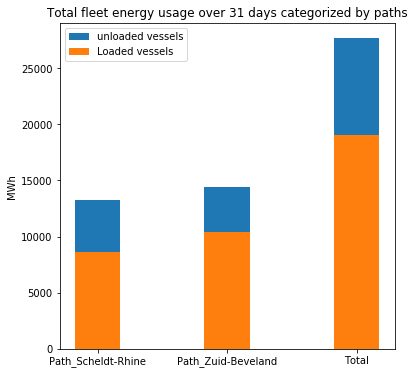

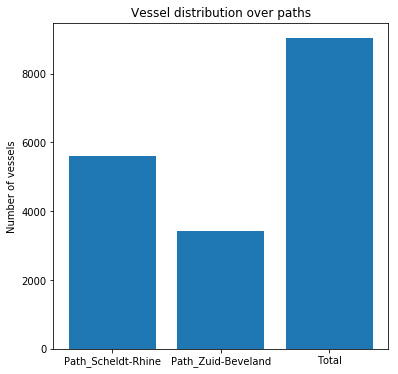

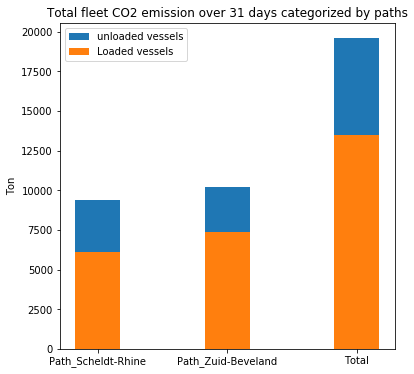

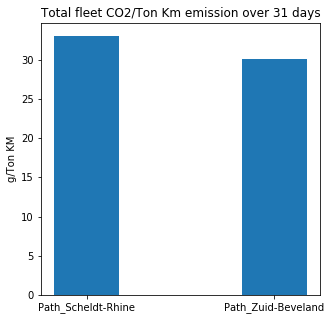

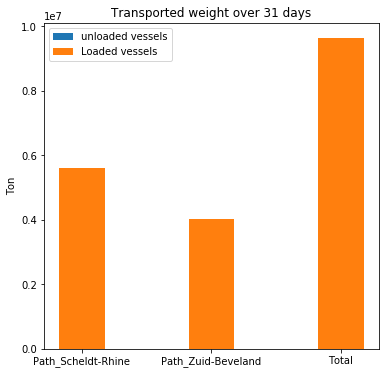

In [9]:
# Add graph to environment
env.FG = FG

env.paths = {}
env.enviromental_report = EnviromentReport()
# 24hours
SIM_TIME = 60 * 60  * 24 * 31
vessels = []

def pois(t):
    hour = int((t%(24*3600))/3600)
    average_on_hour = [5,6,7,8,10,11,12,16,18,19,19,20,19,18,17,15,15,13,11,10,9,7,6,4]
    number_of_boats_this_hour = np.random.normal(average_on_hour[hour])
    if number_of_boats_this_hour == 0:
        return 0
    return 60 * 60 / number_of_boats_this_hour

def setup(env, distribution):
    # initial vessel
    i = 1
    vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
    vessel.env = env
    vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
    env.process(start(env, vessel))
    vessels.append(vessel)

    while True:
        #break
        # timeout before next ship is released
        i += 1
        yield env.timeout(distribution(env.now))
        vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
        vessel.env = env
        vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
        env.process(start(env, vessel))
        vessels.append(vessel)
         
        

        
env.process(setup(env, pois))

env.crossover_points = {182: ((184, 394,154,155,156,216,217, 218), (164, 134,133, 132,73,72,71,402,401)),
                        2: ((218,217,216,156,155,154,394,184), (401, 402,71,72,73,132,133,134,164)),
                        141: ((140,139,179,178,379), (363, 364, 365, 317, 403)),
                        382: ((379,178,179,139,140), (403,317,365,364,363)),
                        273:((222,221,220,279), (272, 209, 208, 210)),
                        278: ((279,220,221,222), (210,208, 209,272))                        
}

env.epoch = datetime.datetime.now()


env.run(until=SIM_TIME)

# EnviromentReport notebook for plot calculations
env.enviromental_report.plot_energy_usage()
env.enviromental_report.plot_path_usage()
env.enviromental_report.plot_co2_emission()
env.enviromental_report.plot_co2_emission_km_load()
env.enviromental_report.plot_transported_weight_corridor()

In [10]:
env.enviromental_report.get_transported_weight_corridor()


{'Path_Scheldt-Rhine': {'loaded': 5612150.0, 'unloaded': 625.0},
 'Path_Zuid-Beveland': {'loaded': 4017343.0499999877, 'unloaded': 2800.0}}

In [11]:
vessel_log = pd.DataFrame.from_dict(vessels[0].log)
#
print(vessel_log.to_string())
print(len(vessels))


                                     Message     Timestamp Value                               Geometry
0                              Start sailing      0.000000                 POINT (4.3007857 51.3503648)
1      Sailing from node 41 to node 43 start      0.000000     0           POINT (4.3007857 51.3503648)
2       Sailing from node 41 to node 43 stop    101.157245     0           POINT (4.2984587 51.3472541)
3      Sailing from node 43 to node 47 start    101.157245     0           POINT (4.2984587 51.3472541)
4       Sailing from node 43 to node 47 stop    157.525882     0           POINT (4.2982523 51.3453443)
5      Sailing from node 47 to node 81 start    157.525882     0           POINT (4.2982523 51.3453443)
6       Sailing from node 47 to node 81 stop    314.183894     0           POINT (4.2898218 51.3459962)
7      Sailing from node 81 to node 94 start    314.183894     0           POINT (4.2898218 51.3459962)
8       Sailing from node 81 to node 94 stop    449.767657     0

Path_Scheldt-Rhine


C:\Users\leo1_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


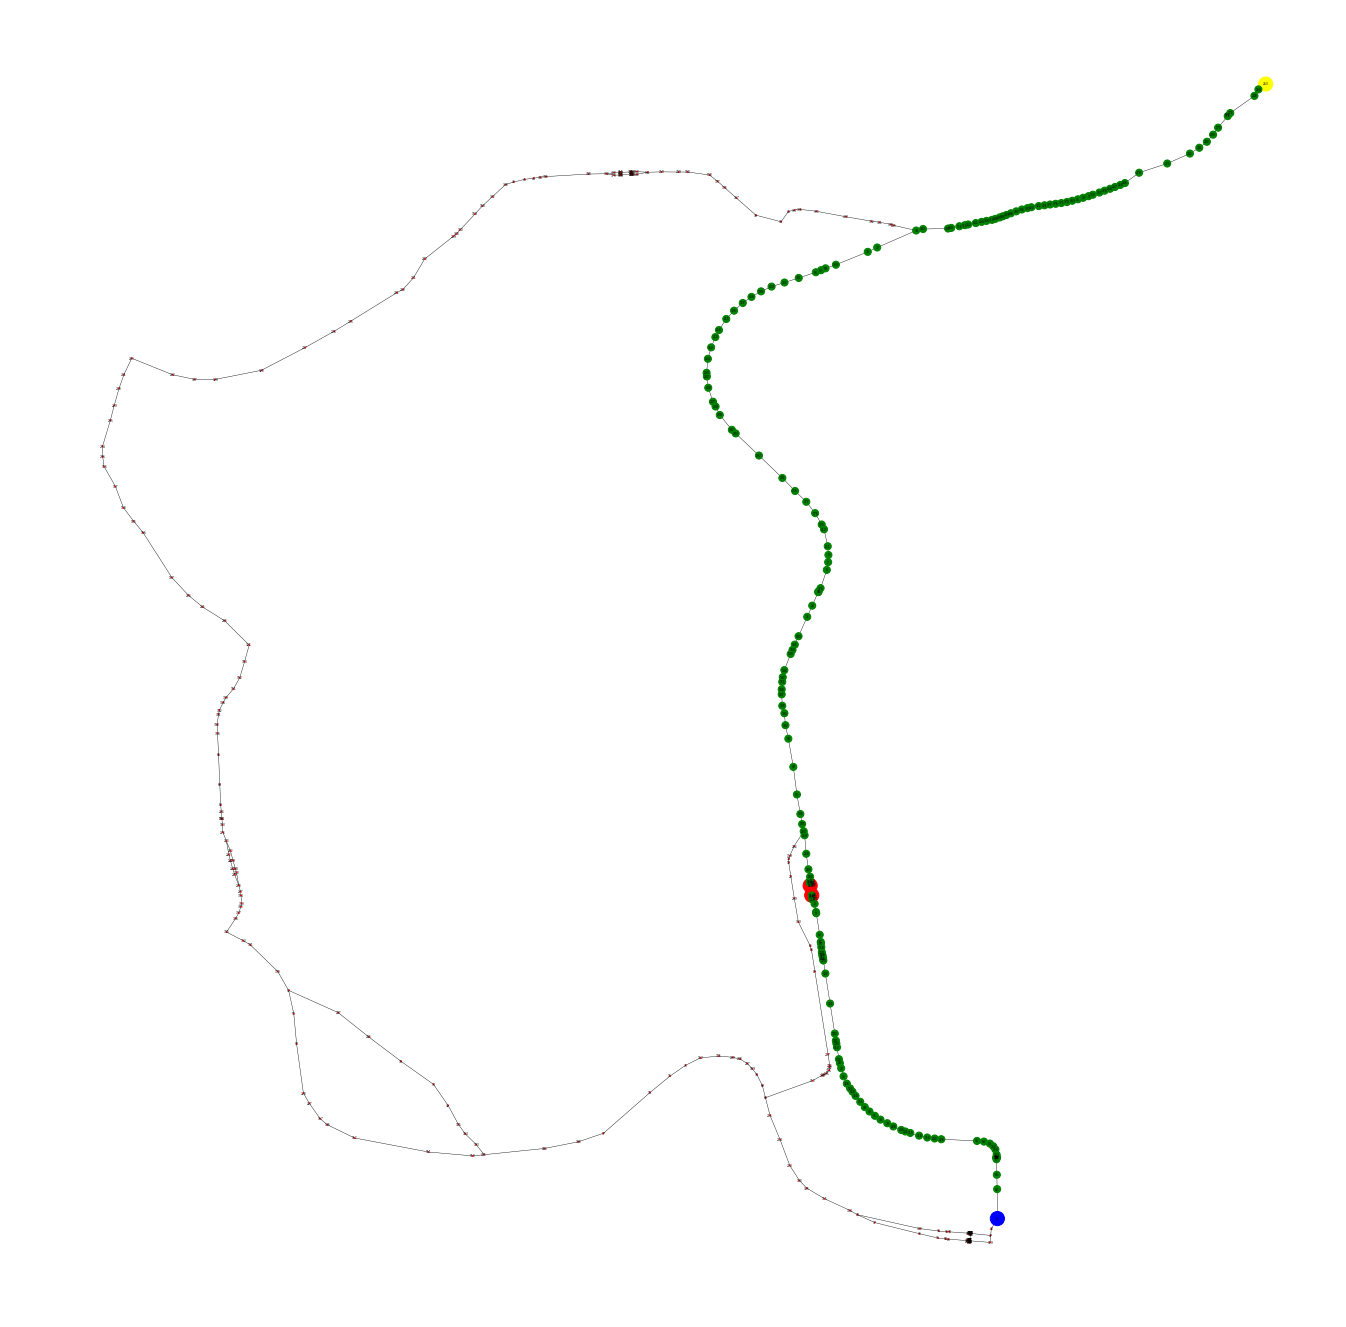

In [12]:
# running  saves a plot for all vessels
'''
for vessel in vessels[:10]:
    print(vessel.path_complete.name)
    vessel.path_complete.plot(FG, True, vessel.name)
''' 
print(vessels[3].path_complete.name)
vessels[3].path_complete.plot(FG, False, vessels[3].name)

In [13]:
# this way I can see activity at lock
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        print(lock_log, edge[2]["attribute"].lock_name)

            Message     Timestamp      Value
0      Ship in lock  9.829853e+03     ship-4
1      Ship in lock  1.001976e+04    ship-11
2     Ship out lock  1.138985e+04     ship-4
3     Ship out lock  1.157976e+04    ship-11
4      Ship in lock  1.238541e+04     ship-6
5      Ship in lock  1.294426e+04    ship-10
6      Ship in lock  1.374130e+04    ship-16
7     Ship out lock  1.394541e+04     ship-6
8     Ship out lock  1.450426e+04    ship-10
9      Ship in lock  1.490541e+04     ship-8
10    Ship out lock  1.530130e+04    ship-16
11     Ship in lock  1.607161e+04    ship-21
12    Ship out lock  1.646541e+04     ship-8
13     Ship in lock  1.646541e+04    ship-24
14     Ship in lock  1.680580e+04    ship-23
15    Ship out lock  1.763161e+04    ship-21
16    Ship out lock  1.802541e+04    ship-24
17    Ship out lock  1.836580e+04    ship-23
18     Ship in lock  1.847072e+04    ship-17
19     Ship in lock  1.859161e+04    ship-22
20     Ship in lock  1.880465e+04    ship-30
21    Ship

In [14]:
print(vessels[0].path_complete.length)
print(vessels[0].loaded_capacity)
print(vessels[0].distance)
print(vessels[1].distance)
print(vessels[0].loaded_capacity)



84567.37980081535
1025.0
84558.83309978347
84558.83309978347
1025.0


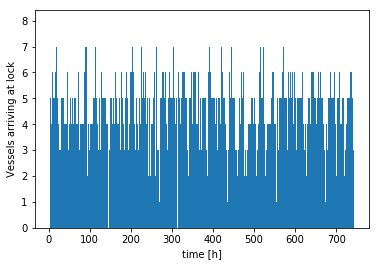

Kreekraklock


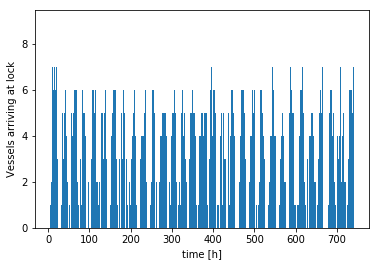

Kreekraklock


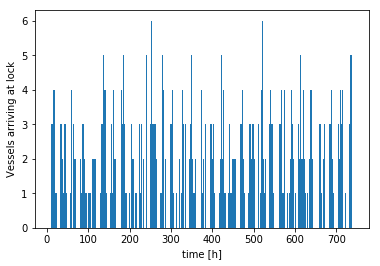

Krammerlock


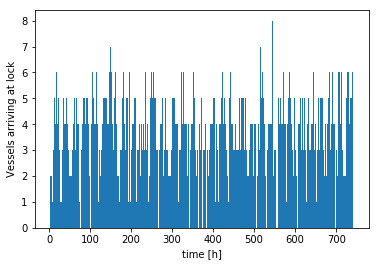

Hansweertlock


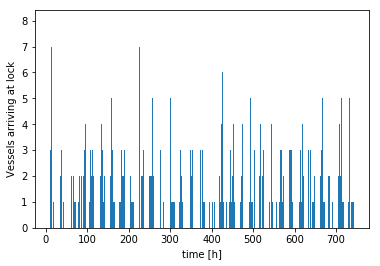

Hansweertlock


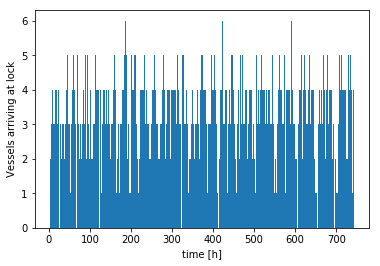

Krammerlock


In [15]:
# this way I can see activity at lock in graph
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        edge[2]["attribute"].plot_arrivales()
        lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        #print(lock_log, edge[2]["attribute"].lock_name)
        print(edge[2]["attribute"].lock_name)
           
        
